# BÀI TOÁN: Dự đoán chất lượng thời tiết.

# KHÁM PHÁ DỮ LIỆU

## Tải các thư viện cần thiết

In [21]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


## Tải bộ dữ liệu

In [22]:
# Read the data
data = pd.read_csv('Dataset/final_data_v1.csv')

## Xem vài dòng trong dữ liệu

In [23]:
data.head()

,datetime,date,time,temp,weather,wind,wind_direction,humidity,pressure,aqi,co,no,no2,o3,so2,pm2_5,pm10,nh3
0,1/1/2021 0:00,1/1/2021,0:00,24.0,Passing clouds.,13.0,30.0,61.0,1012.0,3,700.95,0.44,35.99,17.35,32.90,20.33,26.64,8.99
1,1/1/2021 1:00,1/1/2021,1:00,24.0,Passing clouds.,11.0,40.0,61.0,1011.0,3,847.82,2.46,38.04,18.06,36.24,23.32,30.54,9.37
2,1/1/2021 2:00,1/1/2021,2:00,23.0,Passing clouds.,9.0,20.0,65.0,1011.0,3,894.55,5.25,38.39,23.25,41.01,24.16,31.93,9.25
3,1/1/2021 3:00,1/1/2021,3:00,23.0,Passing clouds.,7.0,10.0,65.0,1011.0,3,827.79,6.20,36.33,33.98,43.39,23.20,30.91,8.61
4,1/1/2021 4:00,1/1/2021,4:00,23.0,Passing clouds.,13.0,50.0,65.0,1011.0,2,660.90,3.69,29.13,54.36,35.76,19.50,25.60,6.21


## Dữ liệu tổng quát

### Dataset có bao nhiêu dòng (record) và bao nhiêu cột (feature)?

In [24]:
data.shape

(36624, 18)

### Các loại dữ liệu của từng cột là gì? Mỗi cột dữ liệu thể hiện điều gì? Mỗi dòng dữ liệu đại diện cho thực thể nào? 

- Mỗi dòng đại diện cho một quan sát về chất lượng không khí và thời tiết tại một thời điểm cụ thể (theo từng giờ).

| Tên Cột            | Kiểu Dữ Liệu | Giải thích ý nghĩa |
|---------------------|--------------|--------------------|
| `datetime`          | datetime       | Thời gian đầy đủ (ngày + giờ) |
| `date`              | date       | Ngày quan sát |
| `time`              | time       | Giờ quan sát |
| `temp`              | numerical      | Nhiệt độ (°C) |
| `weather`           | categorical       | Tình trạng thời tiết  |
| `wind`              | numerical      | Tốc độ gió km/h |
| `wind_direction`    | numerical      | Hướng gió (từ 0°–360°) |
| `humidity`          | numerical      | Độ ẩm tương đối (%) |
| `pressure`          | numerical      | Áp suất khí quyển (mbar) |
| `aqi`               | numerical        | Chất lượng không khí (Air Quality Index) |
| `co`                | numerical      | Nồng độ khí CO μg/m3 |
| `no`                | numerical      | Nồng độ NO μg/m3 |
| `no2`               | numerical      | Nồng độ NO₂ μg/m3 |
| `o3`                | numerical      | Nồng độ O₃ μg/m3 |
| `so2`               | numerical      | Nồng độ SO₂ μg/m3|
| `pm2_5`             | numerical      | Nồng độ bụi mịn PM2.5 μg/m3|
| `pm10`              | numerical      | Nồng độ bụi mịn PM10 μg/m3|
| `nh3`               | numerical      | Nồng độ NH₃  μg/m3 |


## Chất lượng dữ liệu

### Kiểm tra giá trị thiếu (missing value). Missing value ở những cột nào, tỉ lệ bao nhiêu?

In [25]:
data.isnull().sum()

datetime             0
date                 0
time                 0
temp              2697
weather           2697
wind              2697
wind_direction    2697
humidity          2705
pressure          2764
aqi                  0
co                   0
no                   0
no2                  0
o3                   0
so2                  0
pm2_5                0
pm10                 0
nh3                  0
dtype: int64

In [26]:
(data.isnull().sum() / len(data) * 100).round(2)

datetime          0.00
date              0.00
time              0.00
temp              7.36
weather           7.36
wind              7.36
wind_direction    7.36
humidity          7.39
pressure          7.55
aqi               0.00
co                0.00
no                0.00
no2               0.00
o3                0.00
so2               0.00
pm2_5             0.00
pm10              0.00
nh3               0.00
dtype: float64

- Có một số dữ liệu bị thiếu ở các cột `temp`, `weather`, `wind`, `winf_direction`, `humidity`, `pressure` nhưng tỉ lệ bị thiếu không cao (khoảng 7%)

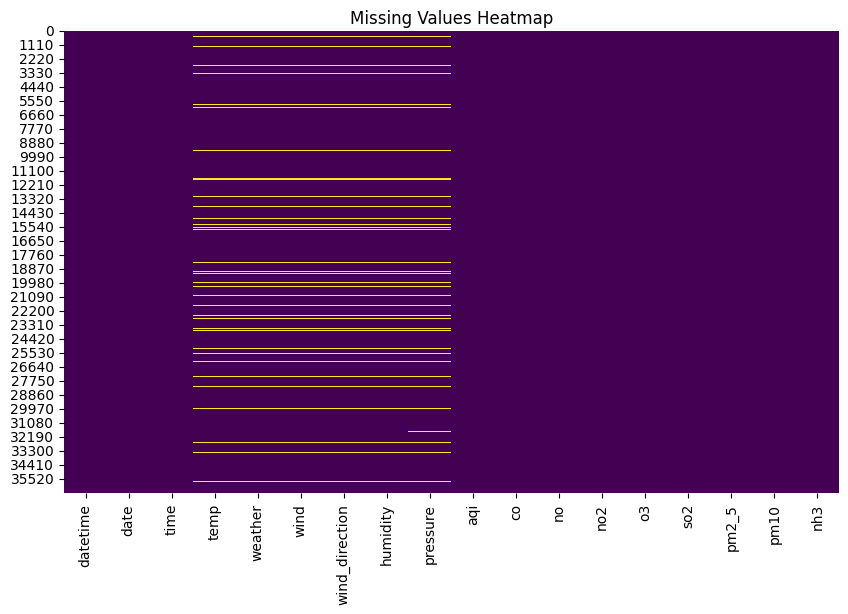

In [27]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()

### Có dữ liệu bất thường không? Có logic nào trong dữ liệu bị sai lệch không?

In [28]:
data.describe()

,temp,wind,wind_direction,humidity,pressure,aqi,co,no,no2,o3,so2,pm2_5,pm10,nh3
count,33927.000000,33927.000000,33927.000000,33919.000000,33860.00000,36624.000000,36624.000000,36624.000000,36624.000000,36624.000000,36624.000000,36624.000000,36624.00000,36624.000000
mean,28.558140,10.129926,140.769770,76.679649,1009.15951,3.646407,1567.254727,24.879395,38.986159,26.008841,46.299565,68.664197,83.06517,11.266072
std,2.987057,5.656383,108.311956,16.193889,5.95274,1.254465,1503.617503,38.551050,77.513882,68.702505,28.416388,80.509615,105.03688,9.726402
min,18.000000,0.000000,0.000000,23.000000,12.00000,1.000000,317.100000,0.000000,-9999.000000,-9999.000000,5.840000,3.450000,-9999.00000,1.520000
25%,26.000000,6.000000,20.000000,66.000000,1008.00000,2.000000,694.270000,1.560000,24.680000,0.020000,26.940000,21.760000,29.28000,6.080000
50%,28.000000,9.000000,140.000000,79.000000,1009.00000,4.000000,1041.410000,8.940000,33.590000,4.870000,38.150000,41.100000,52.42000,8.610000
75%,31.000000,13.000000,240.000000,89.000000,1011.00000,5.000000,1789.090000,32.630000,47.300000,33.620000,57.220000,81.210000,99.53000,13.050000
max,39.000000,50.000000,360.000000,100.000000,1019.00000,5.000000,18585.210000,393.390000,265.960000,446.320000,270.840000,936.130000,1034.27000,186.440000


- Cột `pm10`,`no2`, `o3` có giá trị -9999. Đây chắc chắn là giá trị lỗi. Tiến hành loại bỏ giá trị lỗi và sử dụng phương pháp ForwardFill

In [29]:
data.replace(-9999, float('nan'), inplace=True)
data.fillna(method='ffill', inplace=True)

/tmp/ipykernel_116478/3767734095.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


### Có dữ liệu trùng lặp không?

In [80]:
print("Duplicate rows:\n", data.duplicated().sum())

Duplicate rows:
 0


## Phân phối dữ liệu?

### Các biến liên tục (numerical) phân bố như thế nào?

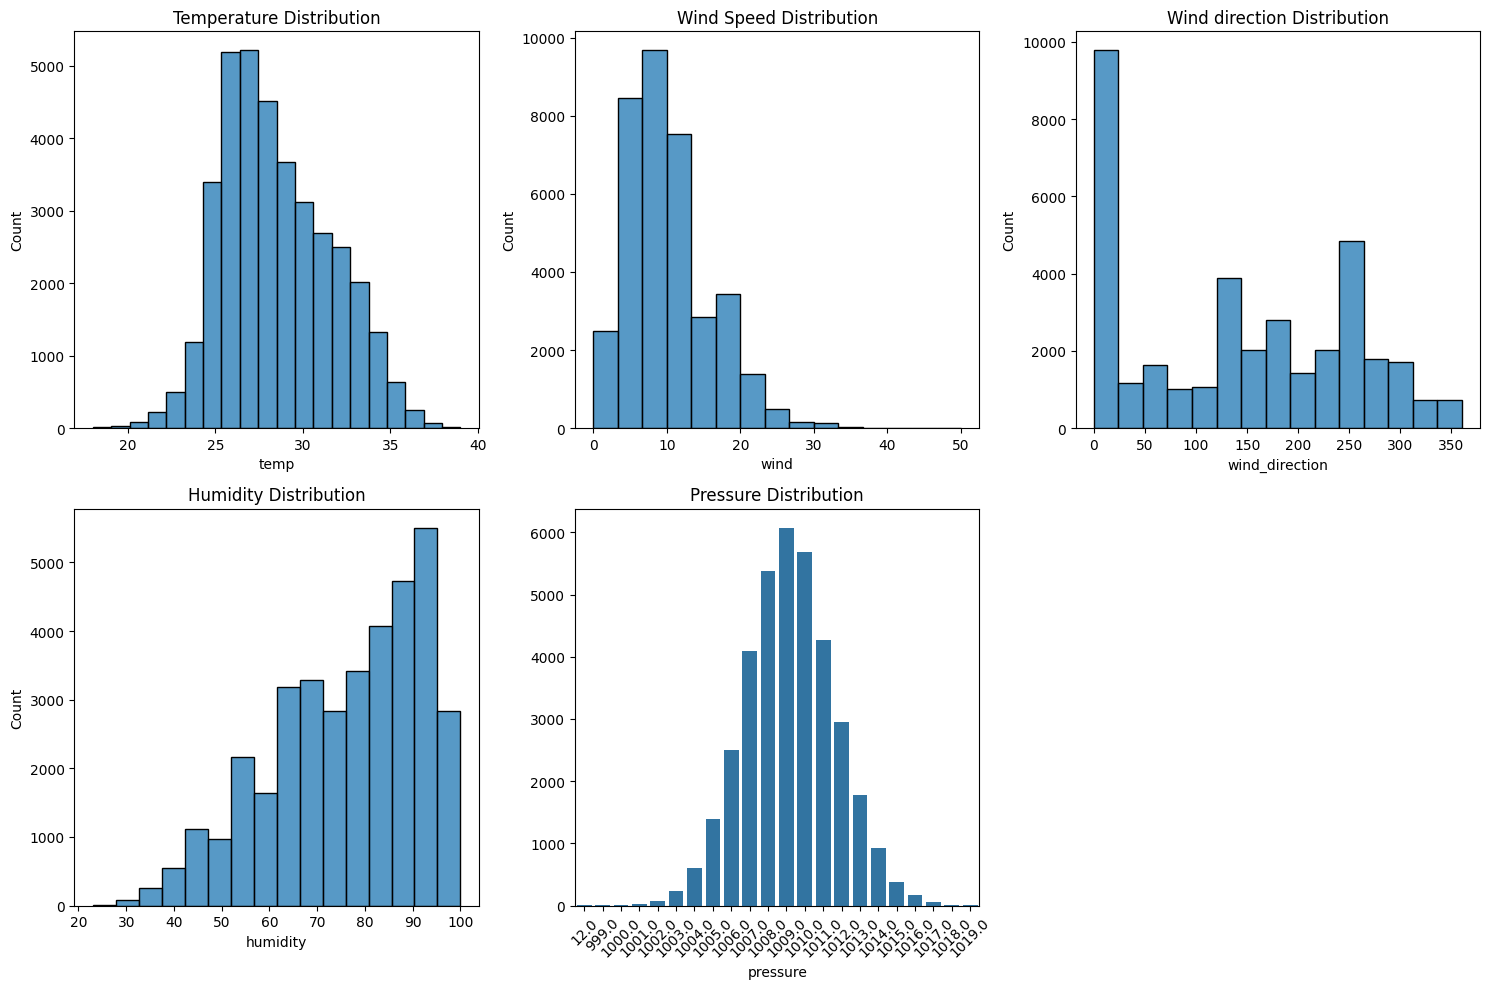

In [ ]:
plt.figure(figsize=(15, 10))
plt.subplot(2, 3, 1)
sns.histplot(data['temp'], bins=20)
plt.title("Temperature Distribution")

plt.subplot(2, 3, 2)
sns.histplot(data['wind'], bins=15)
plt.title("Wind Speed Distribution")

plt.subplot(2, 3, 3)
sns.histplot(data['wind_direction'], bins=15)
plt.title("Wind direction Distribution")

plt.subplot(2, 3, 4)
sns.histplot(data['humidity'], bins=16)
plt.title("Humidity Distribution")

plt.subplot(2, 3, 5)
pressure_counts = data['pressure'].value_counts().sort_index()
sns.barplot(x=pressure_counts.index, y=pressure_counts.values)
plt.title('Pressure Distribution')
plt.xticks(rotation=45)


plt.tight_layout()

Nhận thấy `wind_direction` giá trị 0 chiếm phần lớn, cho nên cột này không có giá trị về mặt trực quan cũng như mô hình.

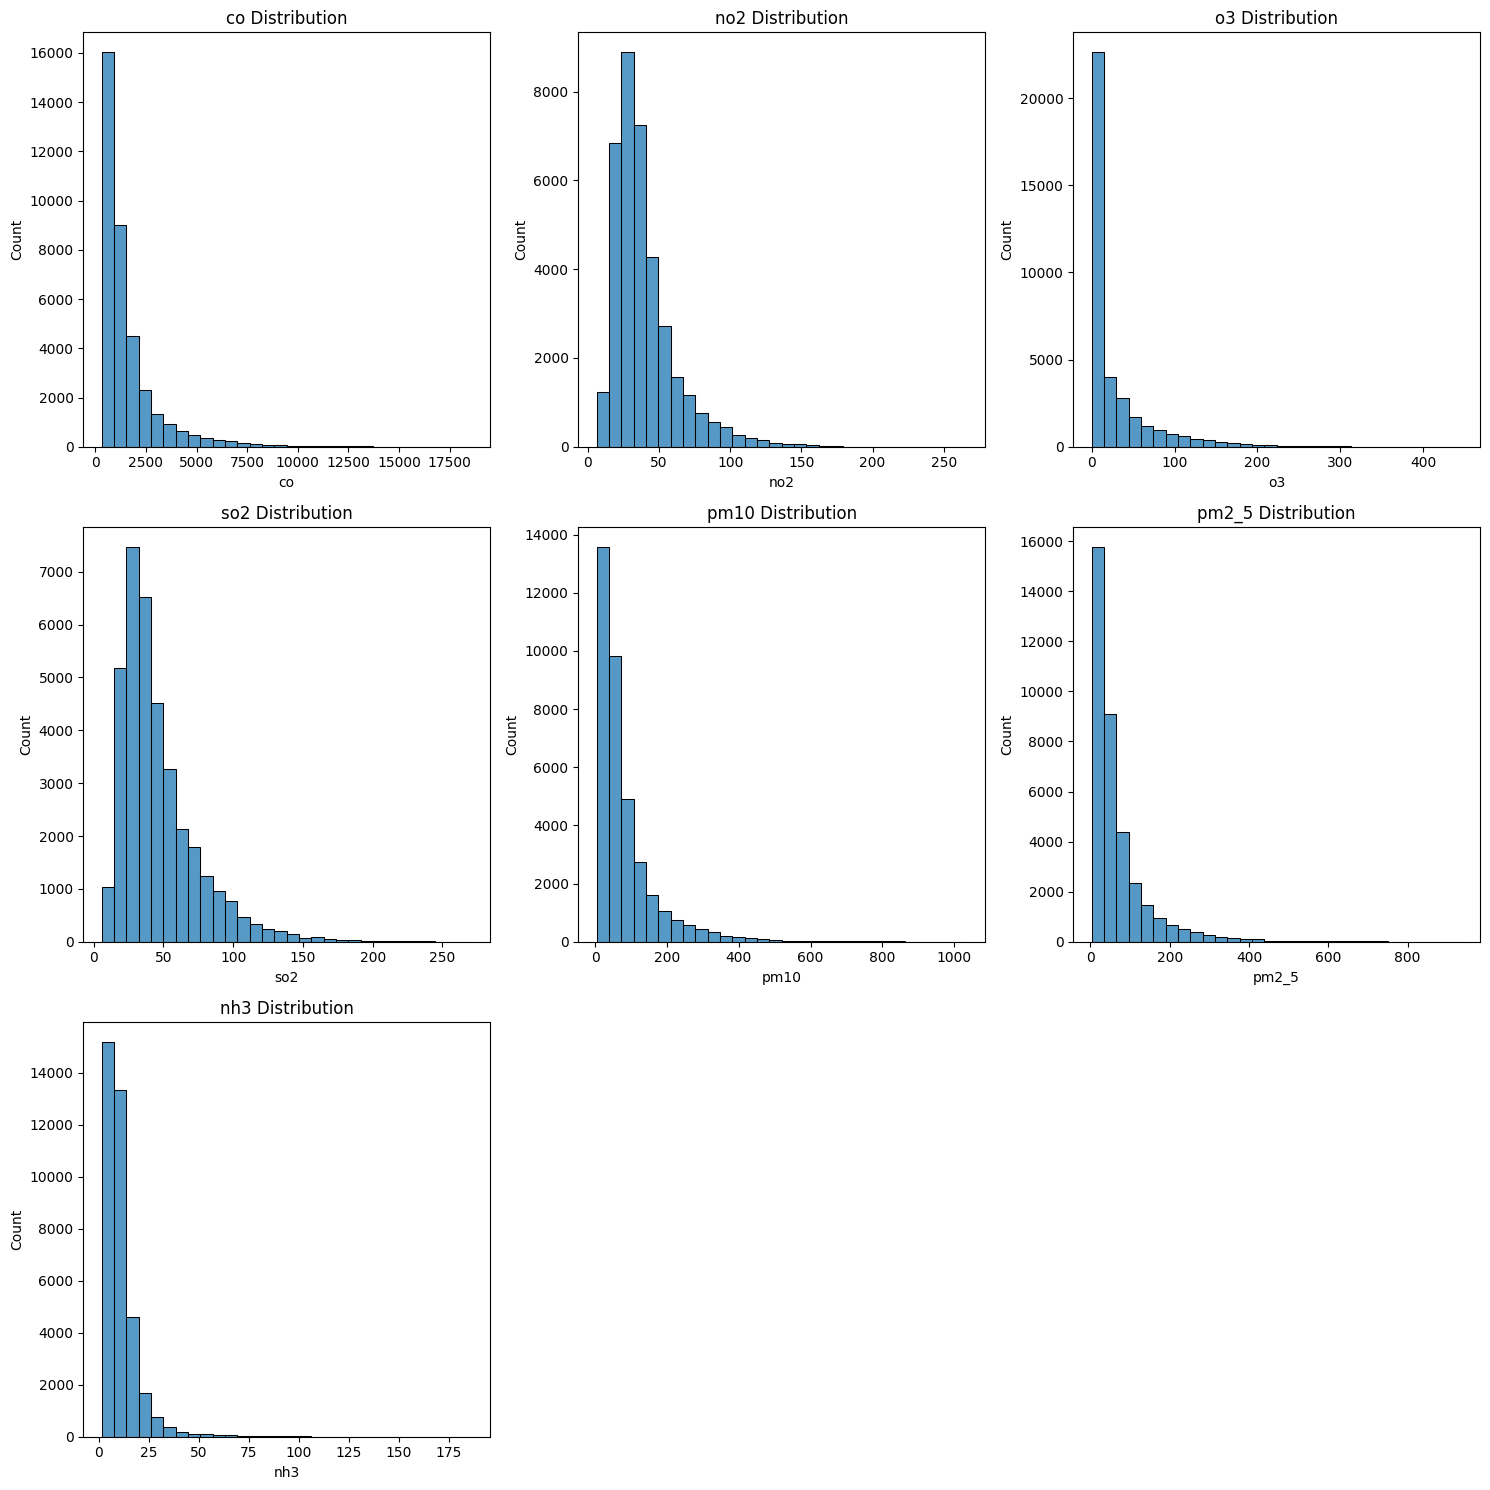

In [32]:
cols = ['co', 'no2', 'o3', 'so2', 'pm10', 'pm2_5', 'nh3']
plt.figure(figsize=(15, 15))
for col in cols:
    plt.subplot(3, 3, cols.index(col) + 1)
    sns.histplot(data[col], bins=30)
    plt.title(f"{col} Distribution")
    plt.xlabel(col)
plt.tight_layout()
plt.show()

**Nhận xét:**
- **Hình dạng phân phối**: Hầu hết các biến đều lệch phải, phù hợp với đặc tính của dữ liệu môi trường, nơi các giá trị cao là hiếm và thường liên quan đến sự kiện ô nhiễm nghiêm trọng.

### Các biến phân loại (categorical) có bao nhiêu nhóm? (và phân phối nhóm ra sao)

In [33]:

data['date'] = pd.to_datetime(data['date'])
data['time'] = pd.to_datetime(data['time'], format='%H:%M').dt.time
data['datetime'] = pd.to_datetime(data['datetime'])

- Cần được chuẩn hóa vì có thể có ý nghĩa đối việc làm các mô hình dự đoán chất lượng thời tiết.

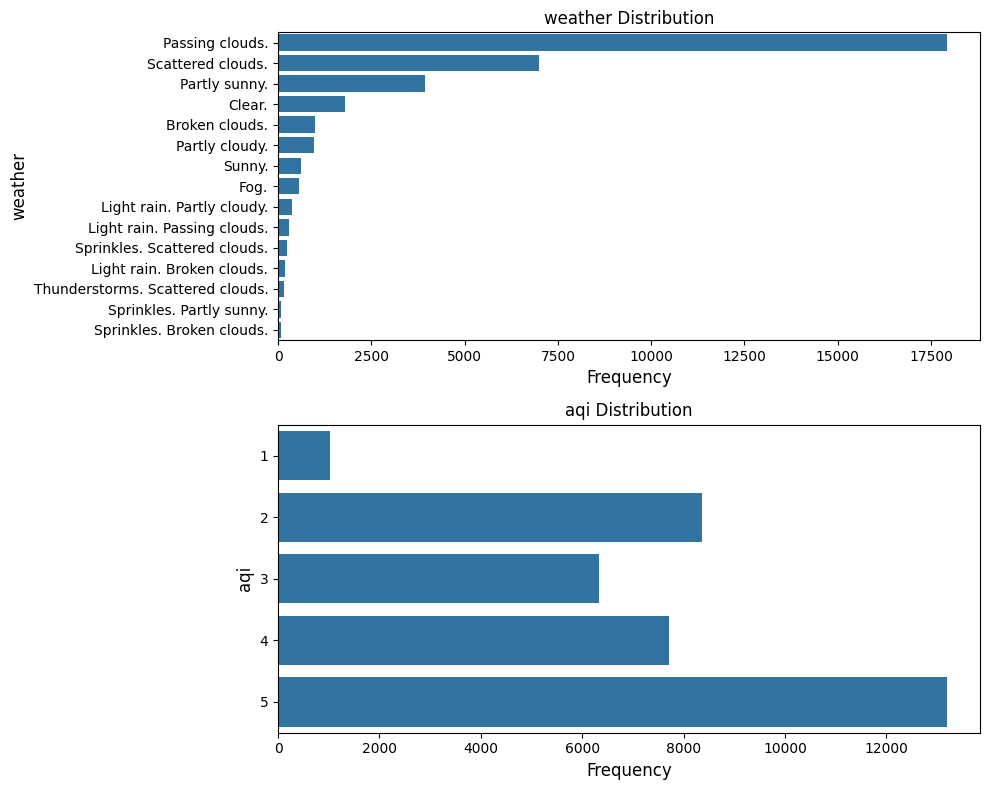

In [34]:
cols = ['weather', 'aqi']

plt.figure(figsize=(10, 8))
for col in cols:
    count = data[col].value_counts()[:15]  
    plt.subplot(2, 1, cols.index(col) + 1)  
    sns.barplot(x=count.values, y=count.index, orient='h')  
    plt.title(f"{col} Distribution")
    plt.xlabel('Frequency', fontsize=12)
    plt.ylabel(col, fontsize=12)

plt.tight_layout()
plt.show()

Nhận xét:

- **Weather**: Các giá trị chủ yếu tập trung ở các trạng thái "Passing clouds", "Scattered clouds" và "Partly sunny", các trạng thái thời tiết khác rất ít xuất hiện.
- **AQI**: trong đó mức **5** chiếm tỉ lệ cao nhất (cho thấy mức độ ô nhiễm ở đây), tiếp theo là các mức **2**, **4**, và **3**, còn mức **1** xuất hiện rất ít (đồng nghĩa với việc không khí ở đây rất ít khi trong lành).

## Mối quan hệ giữa các biến

### Có mối tương quan nào giữa các biến số không? (correlation matrix)

In [35]:
cols = ['aqi', 'co', 'no2', 'o3', 'so2', 'pm10', 'pm2_5', 'nh3', 'temp', 'humidity', 'pressure', 'wind', 'wind_direction']

corr_matrix = data[cols].corr()
target_feature = 'aqi'
correlations = corr_matrix[target_feature].abs().sort_values(ascending = False)
print(f"Correlation score:")
print(correlations[1:])

Correlation score:
pm10              0.613918
pm2_5             0.600069
co                0.573488
so2               0.556137
no2               0.483460
nh3               0.475341
wind              0.269075
wind_direction    0.107287
temp              0.081518
o3                0.047543
pressure          0.037235
humidity          0.013486
Name: aqi, dtype: float64


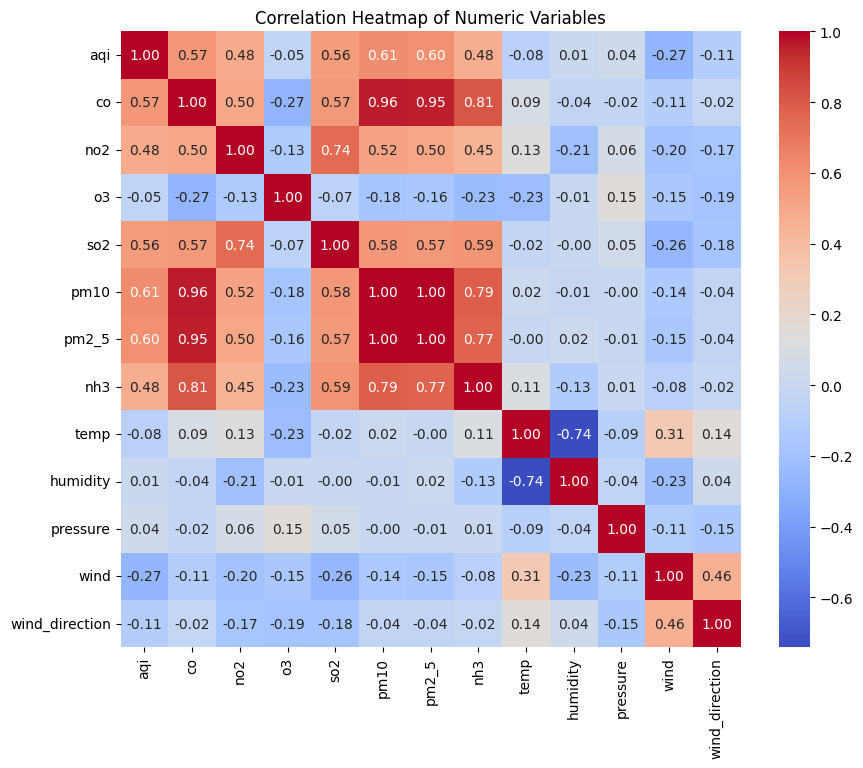

In [36]:
plt.figure(figsize=(10, 8))
sns.heatmap(data[cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap of Numeric Variables")
plt.show()


**Nhận xét:**

- **Tương quan mạnh giữa các biến ô nhiễm**: PM2.5, PM10, CO, NO, NO2, SO2 và AQI có mối tương quan cao với nhau (hệ số từ 0.5 đến gần 1.0), bởi vì chất lượng không khí được đánh giá trực tiếp từ các chỉ số này.
- **Ảnh hưởng của thời tiết**: Độ ẩm có tương quan âm mạnh với nhiệt độ (r ≈ -0.74). Tốc độ gió có tương quan âm nhẹ với các chất ô nhiễm, nhưng mức độ không quá lớn (r ≈ -0.1 đến -0.2). Áp suất hầu như không liên quan rõ ràng đến các chỉ số ô nhiễm.


Chỉ số AQI trung bình từng thời điểm trong ngày

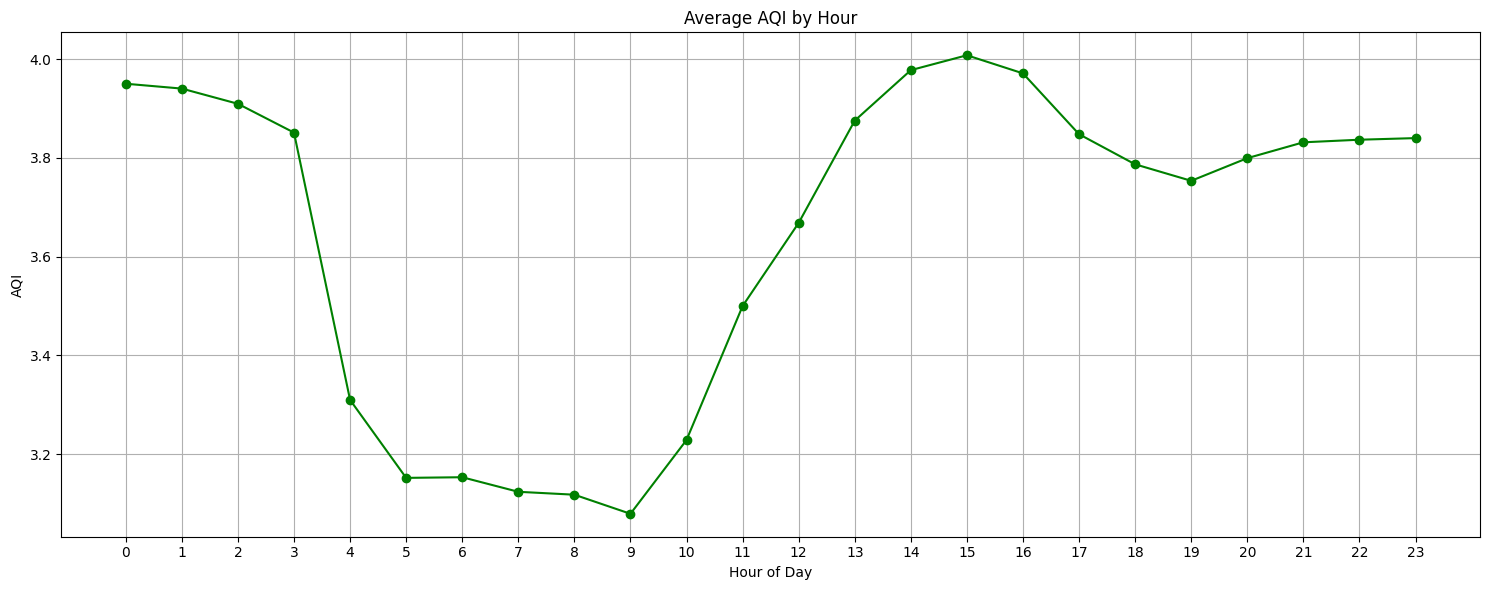

In [82]:
# Giả sử cột 'datetime' đã chuẩn hoá định dạng
data['hour'] = pd.to_datetime(data['datetime']).dt.hour

# Trung bình AQI theo từng giờ
aqi_by_hour = data.groupby('hour')['aqi'].mean().reset_index()

# Vẽ biểu đồ
plt.figure(figsize=(15, 6))
plt.plot(aqi_by_hour['hour'], aqi_by_hour['aqi'], marker='o', color='green')
plt.title('Average AQI by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('AQI')
plt.xticks(range(0, 24))  # giờ từ 0 đến 23
plt.grid(True)
plt.tight_layout()
plt.show()


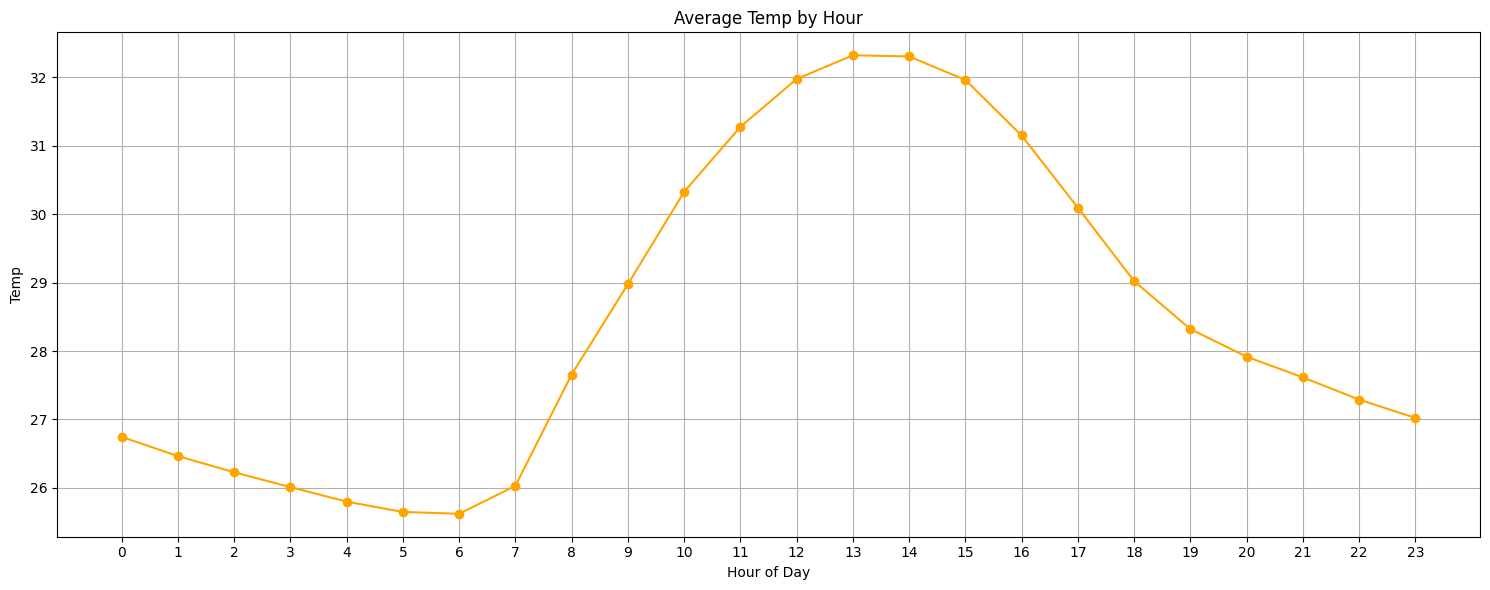

In [81]:
# Trung bình AQI theo từng giờ
temp_by_hour = data.groupby('hour')['temp'].mean().reset_index()

# Vẽ biểu đồ
plt.figure(figsize=(15, 6))
plt.plot(temp_by_hour['hour'], temp_by_hour['temp'], marker='o', color='orange')
plt.title('Average Temp by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Temp')
plt.xticks(range(0, 24))  # giờ từ 0 đến 23
plt.grid(True)
plt.tight_layout()
plt.show()


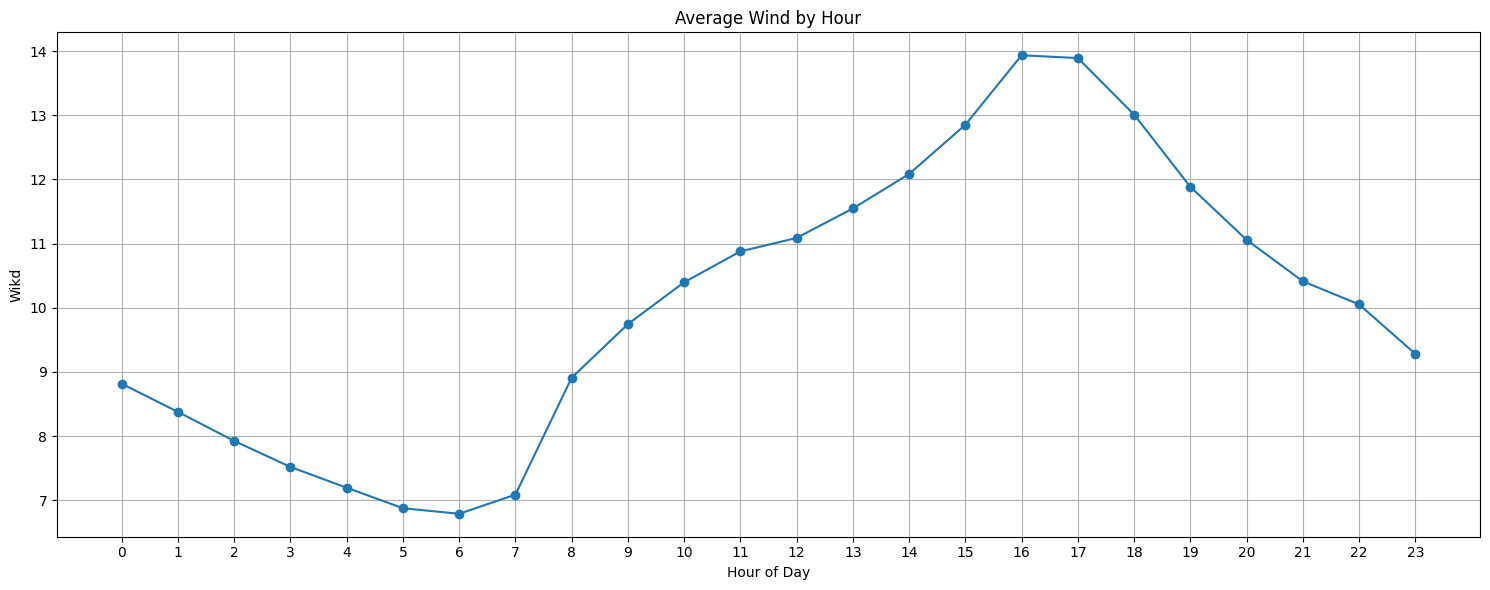

In [79]:
# Trung bình AQI theo từng giờ
wind_by_hour = data.groupby('hour')['wind'].mean().reset_index()

# Vẽ biểu đồ
plt.figure(figsize=(15, 6))
plt.plot(wind_by_hour['hour'], wind_by_hour['wind'], marker='o')
plt.title('Average Wind by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Wikd')
plt.xticks(range(0, 24))  # giờ từ 0 đến 23
plt.grid(True)
plt.tight_layout()
plt.show()


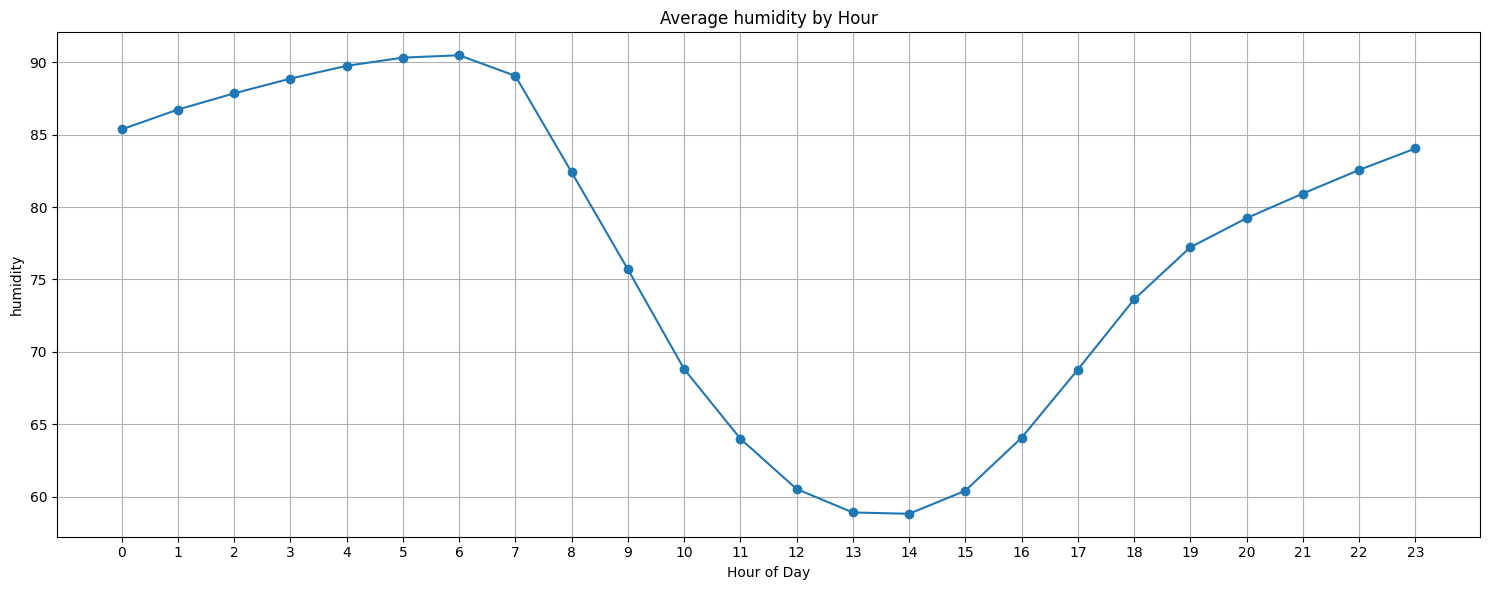

In [83]:
# Trung bình AQI theo từng giờ
humidity_by_hour = data.groupby('hour')['humidity'].mean().reset_index()

# Vẽ biểu đồ
plt.figure(figsize=(15, 6))
plt.plot(humidity_by_hour['hour'], humidity_by_hour['humidity'], marker='o')
plt.title('Average humidity by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('humidity')
plt.xticks(range(0, 24))  # giờ từ 0 đến 23
plt.grid(True)
plt.tight_layout()
plt.show()


**Nhận xét**
- AQI cao nhất trong ngày (~4.0) – điều này có thể là do: Gió yếu hoặc không có gió, khiến không khí ô nhiễm tích tụ. Và các hoạt động công nghiệp ban đêm diễn ra mạnh .Chưa có ánh sáng mặt trời để kích hoạt quá trình khuếch tán không khí.
- Từ 4h đến 9h, Chỉ số AQI giảm mạnh, chạm đáy vào khoảng 9h: Nguyên nhân Mặt trời lên, Nhiệt độ tăng -> khuếch tán chất ô nhiễm tốt hơn
- 10h – 15h, AQI tăng trở lại, đạt đỉnh lúc 14–15h (~4.0): Các hoạt động giao thông – công nghiệp diễn ra mạnh. 
- Chiều đến tối muộn, AQI ổn định ở mức trung bình cao: Tương ứng với giờ cao điểm chiều – nhiều phương tiện → khí thải. Không khí ô nhiễm tích tụ.

Nhiệt độ theo độ ẩm

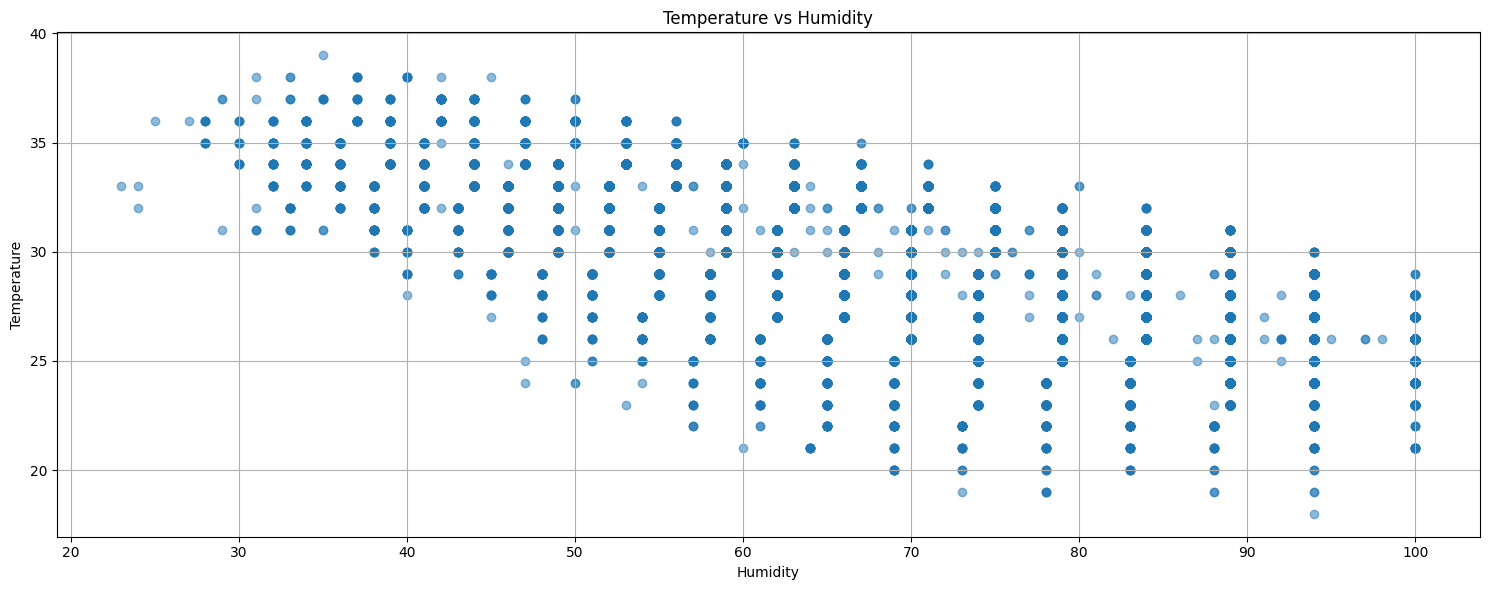

In [69]:
# Vẽ nhiet do theo do am
plt.figure(figsize=(15, 6))
plt.scatter(data['humidity'], data['temp'], alpha=0.5)
plt.title('Temperature vs Humidity')
plt.xlabel('Humidity')  
plt.ylabel('Temperature')
plt.grid(True)
plt.tight_layout()
plt.show()


### Phân tích một số chuỗi thời gian

Dữ liệu thời tiết trong nghiên cứu này chủ yếu tập trung vào các yếu tố quan trọng như nhiệt độ, tốc độ gió, độ ẩm và áp suất, giúp phản ánh những đặc trưng khí hậu cơ bản của khu vực được khảo sát.

Phần phân tích các biến theo thời gian sẽ giúp chúng ta khám phá diễn biến của các yếu tố này, với các mục tiêu chính như:

- **Nhận diện xu hướng**: Tìm hiểu xem các yếu tố có xu hướng tăng, giảm hay giữ ổn định theo thời gian.
- **Phát hiện tính mùa vụ**: Phân tích để tìm ra những chu kỳ lặp lại trong các yếu tố thời tiết.
- **Hiểu mối quan hệ giữa các biến**: Xác định các mối liên hệ (patterns) giữa các yếu tố thời tiết và sự thay đổi theo thời gian.
- **Chuẩn bị cho dự báo**: Cung cấp cơ sở để lựa chọn các đặc trưng phù hợp và xây dựng mô hình time-series nhằm dự đoán các yếu tố thời tiết hoặc chất lượng không khí trong tương lai.



In [37]:
from statsmodels.tsa.seasonal import seasonal_decompose

def analyze_time_series(dataset, variable, freq='ME', decompose_period=12):
    """
    Hàm phân tích chuỗi thời gian cho một biến cụ thể.
    
    Parameters:
    - dataset: DataFrame chứa dữ liệu, phải có cột 'datetime'.
    - variable: Tên cột biến cần phân tích (ví dụ: 'temp', 'humidity').
    - freq: Tần suất resample (mặc định là 'M' - theo tháng).
    - rolling_window: Kích thước cửa sổ trung bình động (mặc định là 7).
    - decompose_period: Chu kỳ phân rã mùa vụ (mặc định là 12 cho dữ liệu hàng tháng).
    """
    
    # Resample dữ liệu theo tần suất (freq) và tính trung bình
    new_data = dataset.resample(freq, on='datetime')[variable].mean()
    
    fig = plt.figure(figsize=(10, 10))
    
    # Phân rã chuỗi thời gian
    decomposition = seasonal_decompose(new_data, model='additive', period=decompose_period)
    
    # Biểu đồ 2: Observed (dữ liệu gốc)
    ax2 = fig.add_subplot(5, 1, 1)
    ax2.plot(decomposition.observed, color='blue')
    ax2.set_title('Observed', fontsize=10)
    ax2.set_xlabel('Date', fontsize=8)
    ax2.tick_params(axis='x', rotation=45)
    
    # Biểu đồ 3: Trend
    ax3 = fig.add_subplot(5, 1, 2)
    ax3.plot(decomposition.trend, color='green')
    ax3.set_title('Trend', fontsize=10)
    ax3.set_xlabel('Date', fontsize=8)
    ax3.tick_params(axis='x', rotation=45)
    
    # Biểu đồ 4: Seasonality
    ax4 = fig.add_subplot(5, 1, 3)
    ax4.plot(decomposition.seasonal, color='orange')
    ax4.set_title('Seasonality', fontsize=10)
    ax4.set_xlabel('Date', fontsize=8)
    ax4.tick_params(axis='x', rotation=45)
    
    # Biểu đồ 5: Residual
    ax5 = fig.add_subplot(5, 1, 4)
    ax5.plot(decomposition.resid, color='red')
    ax5.set_title('Residual', fontsize=10)
    ax5.set_xlabel('Date', fontsize=8)
    ax5.tick_params(axis='x', rotation=45)
    
    # Điều chỉnh layout để tránh chồng chéo
    # vieets tiltle cho tất cả các biểu đồ
    plt.suptitle(f"Time Series Analysis for {variable}")
    plt.tight_layout()
    plt.show()
   

    

#### Nhiệt độ (temp)

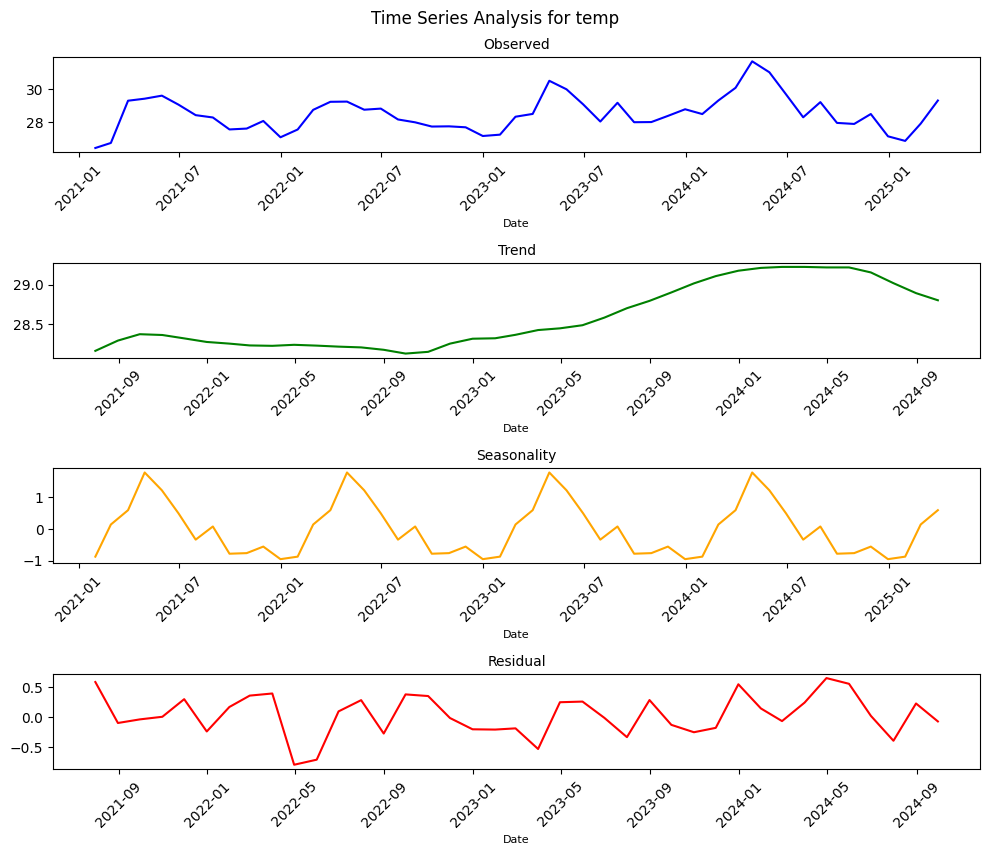

In [38]:
analyze_time_series(data, 'temp', freq='ME', decompose_period=12)

**Nhận xét về `temp` theo thời gian:**
- **Trend**: Nhiệt độ tăng nhẹ từ 2021 (27°C) đến giữa 2024 (gần 30°C), sau đó giảm về 28°C vào 2025, phản ánh biến đổi khí hậu hoặc thay đổi thời tiết.  
- **Seasonality**: Nhiệt độ có chu kỳ 12 tháng, cao vào giữa năm (mùa hè, +2°C), thấp vào đầu/cuối năm (mùa đông, -2°C), phù hợp với khí hậu nhiệt đới/ôn đới.  
- **Residual**: Dao động nhỏ (±0.5°C), dữ liệu ổn định, ít nhiễu.  
- **Ý nghĩa**: Chuỗi có xu hướng và mùa vụ rõ, phù hợp cho dự báo bằng mô hình time-series (SARIMA, LSTM).

#### Độ ẩm (humidity)

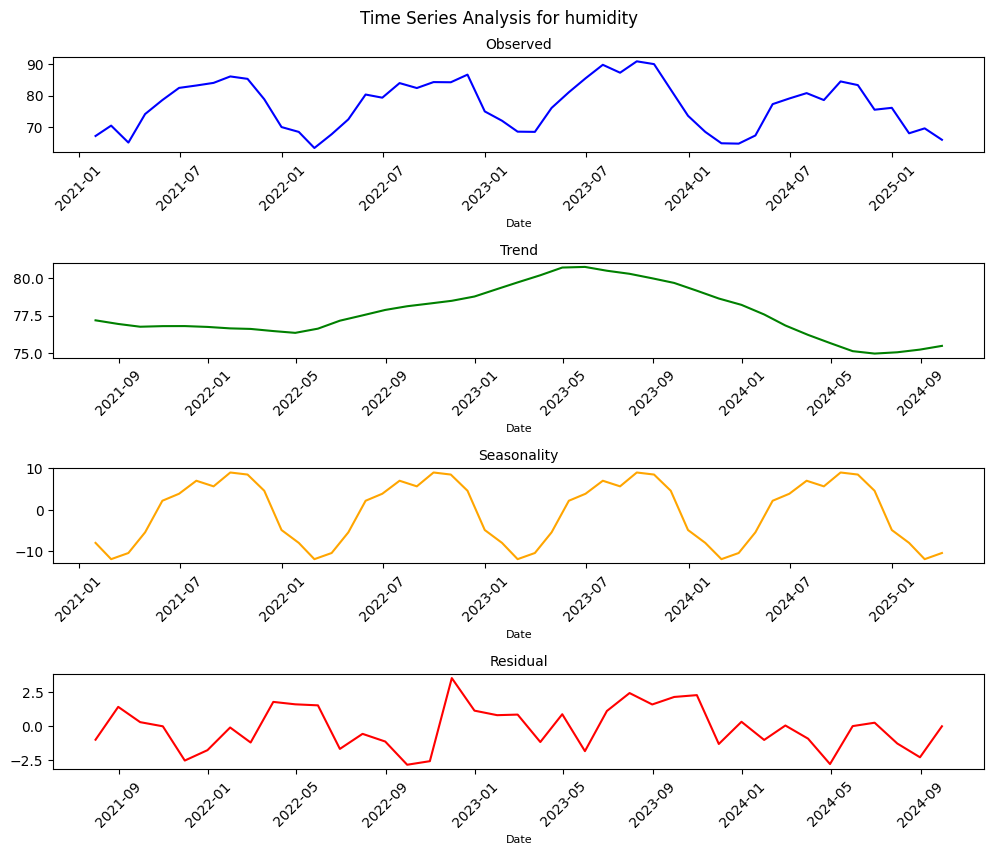

In [39]:
analyze_time_series(data, 'humidity', freq='ME', decompose_period=12)

**Nhận xét về `humidity` theo thời gian:**  
- **Trend**: Độ ẩm trung bình giảm nhẹ từ 2021 (80%) đến giữa 2023 (gần 70%), sau đó tăng trở lại lên khoảng 75% vào 2025, có thể do ảnh hưởng của thời tiết hoặc khí hậu.  
- **Seasonality**: Độ ẩm có chu kỳ 12 tháng, cao vào giữa năm (mùa mưa, +10%), thấp vào đầu/cuối năm (mùa khô, -10%), phù hợp với khí hậu nhiệt đới.  
- **Residual**: Dao động nhỏ (±2%), dữ liệu ổn định, ít nhiễu.  
- **Ý nghĩa**: Chuỗi có xu hướng và mùa vụ rõ, phù hợp cho dự báo bằng mô hình time-series.

#### Gió (wind)

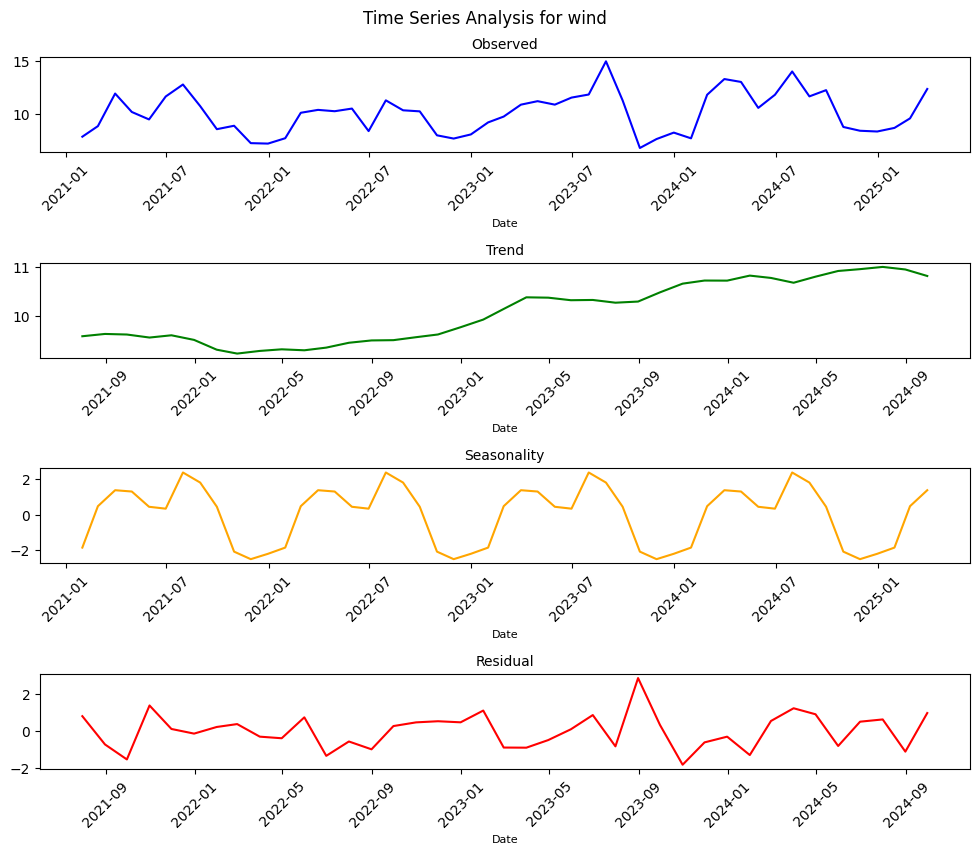

In [40]:
# phân tích chuỗi thời gian cho biến 'wind'
analyze_time_series(data, 'wind', freq='ME', decompose_period=12)

**Nhận xét về `wind` theo thời gian:**  
- **Trend**: Tốc độ gió trung bình tăng nhẹ từ 2021 (9.5) đến giữa 2024 (gần 11), sau đó giảm nhẹ về 10 vào 2025, có thể do ảnh hưởng của thời tiết hoặc khí hậu.  
- **Seasonality**: Tốc độ gió có chu kỳ 12 tháng, cao vào giữa năm (mùa hè, +2), thấp vào đầu/cuối năm (mùa đông, -2), phù hợp với khí hậu nhiệt đới/ôn đới.  
- **Residual**: Dao động nhỏ (±2), dữ liệu ổn định, ít nhiễu.  
- **Ý nghĩa**: Chuỗi có xu hướng và mùa vụ rõ, phù hợp cho dự báo bằng mô hình time-series.

#### Áp suất (pressure)

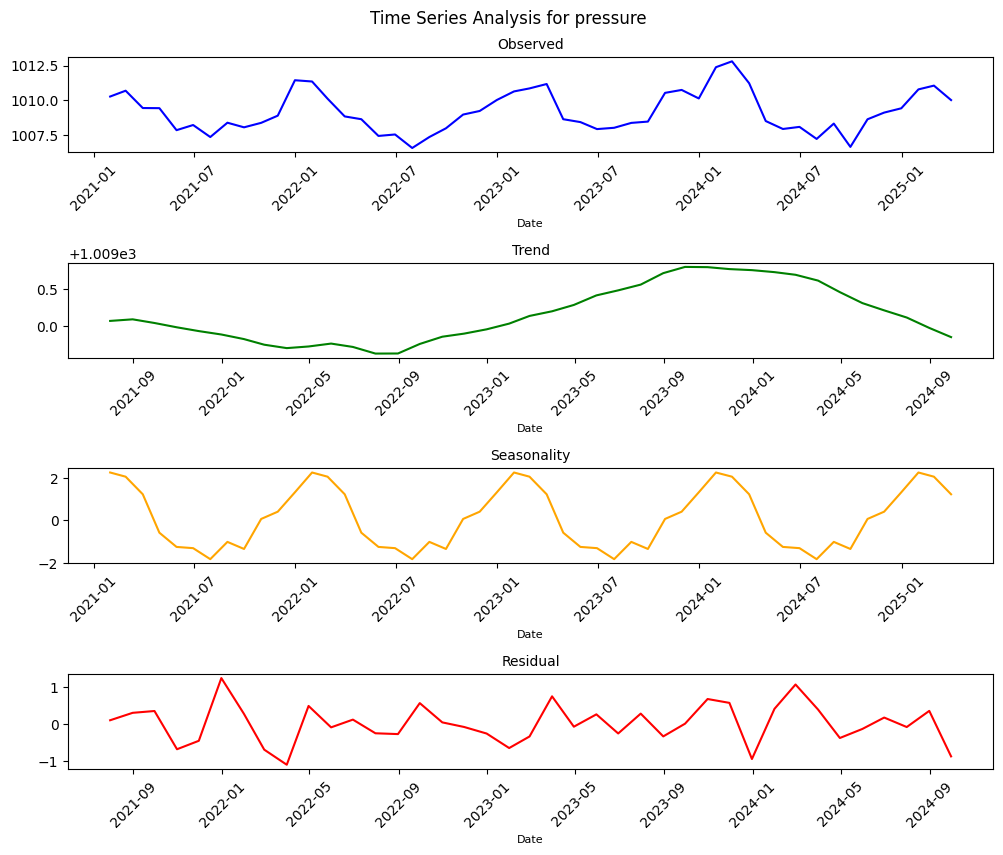

In [41]:
# phân tích chuỗi thời gian cho biến 'pressure'
analyze_time_series(data, 'pressure', freq='ME', decompose_period=12)

**Nhận xét về `pressure` theo thời gian:**  
- **Trend**: Áp suất trung bình giảm nhẹ từ 2021 (1010 mBar) đến giữa 2022 (1008 mBar), sau đó tăng lên 1011 mBar vào giữa 2024, rồi giảm nhẹ về 1009 mBar vào 2025, phản ánh biến động khí hậu.  
- **Seasonality**: Áp suất có chu kỳ 12 tháng, cao vào đầu/cuối năm (mùa đông, +1 mBar), thấp vào giữa năm (mùa hè, -1 mBar), phù hợp với khí hậu nhiệt đới/ôn đới.  
- **Residual**: Dao động nhỏ (±1 mBar), dữ liệu ổn định, ít nhiễu.  
- **Ý nghĩa**: Chuỗi có xu hướng và mùa vụ rõ, phù hợp cho dự báo bằng mô hình time-series.

# MÔ HÌNH DỰ ĐOÁN

## Kiểm tra tính dừng và dùng SARIMA để dự đoán đặc trưng

In [42]:
from statsmodels.tsa.stattools import adfuller

def check_stationarity(dataset, variable, freq='ME'):
    """
    Hàm kiểm tra tính ổn định (stationarity) của một chuỗi thời gian bằng kiểm định ADF.
    
    Parameters:
    - dataset: DataFrame chứa dữ liệu, phải có cột 'datetime'.
    - variable: Tên cột biến cần kiểm tra (ví dụ: 'temp', 'humidity').
    - freq: Tần suất resample (mặc định là 'ME' - theo tháng, cuối tháng).
    
    Returns:
    - In ra ADF Statistic, p-value và nhận xét về tính ổn định.
    """
    # Đảm bảo cột 'datetime' là kiểu datetime
    dataset['datetime'] = pd.to_datetime(dataset['datetime'])
    
    # Resample dữ liệu theo tần suất (freq) và tính trung bình
    new_data = dataset.resample(freq, on='datetime')[variable].mean()
    
    # Kiểm định ADF
    result = adfuller(new_data)
    
    # In kết quả
    print(f'ADF Test for {variable.capitalize()}:')
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    
    # Nhận xét về tính ổn định
    if result[1] < 0.05:
        print(f'Chuỗi {variable} ổn định (stationary) với p-value < 0.05.')
    else:
        print(f'Chuỗi {variable} không ổn định (non-stationary) với p-value >= 0.05.')

In [43]:
from statsmodels.tsa.statespace.sarimax import SARIMAX


def forecast_sarima(dataset, variable, split_date='2025-01-01', freq='W', order=(3, 2, 1), seasonal_order=(1, 1, 1, 12), forecast_steps=3):
    """
    Hàm dự đoán chuỗi thời gian bằng mô hình SARIMA và vẽ biểu đồ so sánh.
    
    Parameters:
    - dataset: DataFrame chứa dữ liệu, phải có cột 'datetime'.
    - variable: Tên cột biến cần dự báo (ví dụ: 'temp', 'humidity').
    - split_date: Ngày chia dữ liệu train/test (mặc định là '2025-01-01').
    - freq: Tần suất resample (mặc định là 'ME' - theo tháng, cuối tháng).
    - order: Tuple (p, d, q) cho SARIMA (mặc định là (3, 2, 1)).
    - seasonal_order: Tuple (P, D, Q, s) cho mùa vụ (mặc định là (1, 1, 1, 12)).
    - forecast_steps: Số bước dự báo (mặc định là 2 tháng).
    
    Returns:
    - Biểu đồ so sánh dữ liệu thực tế và dự báo.
    """
    
    # Chia dữ liệu thành train và test
    train_data = dataset[dataset['datetime'] < split_date]  # Dữ liệu trước split_date
    test_data = dataset[dataset['datetime'] >= split_date]  # Dữ liệu từ split_date trở đi
    
    # Tạo series thời gian trung bình theo tần suất cho dữ liệu huấn luyện và kiểm tra
    train_series = train_data.resample(freq, on='datetime')[variable].mean() 
    test_series = test_data.resample(freq, on='datetime')[variable].mean()  
    

    # Xây dựng mô hình SARIMA
    model = SARIMAX(train_series, order=order, seasonal_order=seasonal_order)
    fitted = model.fit()  
    
    # Dự báo
    fc = fitted.forecast(steps=forecast_steps)  # Dự báo số bước forecast_steps
    
    # Lấy khoảng tin cậy (confidence intervals) cho dự báo
    conf_int = fitted.get_forecast(steps=forecast_steps).conf_int(alpha=0.05)
    
    # Chuyển kết quả dự báo thành pandas series
    # Dùng test_series.index[:forecast_steps] để lấy index từ test_series
    if len(test_series) >= forecast_steps:
        fc_index = test_series.index[:forecast_steps]
    else:
        # Nếu test_series không đủ dài, tạo index mới từ ngày bắt đầu của test_series
        fc_index = pd.date_range(start=test_series.index[0], periods=forecast_steps, freq=freq)
    
    fc_series = pd.Series(fc, index=fc_index)
    lower_series = pd.Series(conf_int.iloc[:, 0], index=fc_index)
    upper_series = pd.Series(conf_int.iloc[:, 1], index=fc_index)
    
    # Vẽ đồ thị so sánh dữ liệu thực tế và dự báo
    plt.figure(figsize=(12, 6), dpi=100)
    plt.plot(train_series, label='Training Data')
    plt.plot(test_series, label='Actual Data', color='blue')
    plt.plot(fc_series, label='Forecast', color='red')
    plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=0.15)
    plt.title(f'Forecast vs Actuals (Monthly) - SARIMA', fontsize=14)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel(f'{variable.capitalize()}', fontsize=12)
    plt.legend(loc='upper left', fontsize=10)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    print()


### Nhiệt độ (temp)

In [44]:
# kiểm tra tính dừng của đặc trưng 'temp'
is_stationary = check_stationarity(data, 'temp', freq='ME')

ADF Test for Temp:
ADF Statistic: -4.0295961359064485
p-value: 0.0012632246327010648
Chuỗi temp ổn định (stationary) với p-value < 0.05.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.29927D-01    |proj g|=  3.55732D-01


/home/nguyennn263/miniconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.



At iterate    5    f=  7.53774D-01    |proj g|=  2.49440D-02

At iterate   10    f=  7.35090D-01    |proj g|=  2.27084D-02

At iterate   15    f=  7.28258D-01    |proj g|=  9.06991D-03

At iterate   20    f=  7.26876D-01    |proj g|=  4.02121D-03

At iterate   25    f=  7.26760D-01    |proj g|=  1.66101D-03

At iterate   30    f=  7.26611D-01    |proj g|=  6.84783D-03

At iterate   35    f=  7.26524D-01    |proj g|=  2.99796D-03

At iterate   40    f=  7.26507D-01    |proj g|=  1.60436D-03

At iterate   45    f=  7.26503D-01    |proj g|=  5.53049D-04

At iterate   50    f=  7.26501D-01    |proj g|=  2.80987D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/home/nguyennn263/miniconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


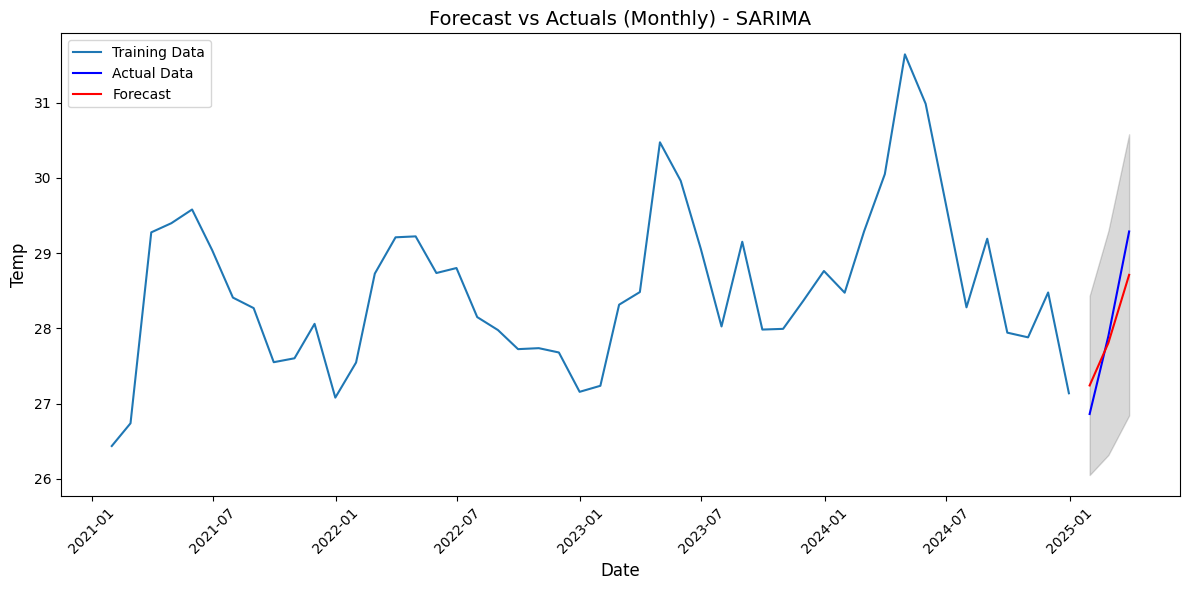

In [45]:
# dự đoán chuỗi thời gian cho biến 'temp' theo tháng
forecast_sarima(data, 'temp', split_date='2025-01-01', freq='ME')

**Nhận xét:**

- **Xu hướng tổng thể**: Mô hình SARIMA đã nắm bắt được xu hướng tổng thể của 'temp' khá tốt trong giai đoạn huấn luyện (trước 01/01/2025), thể hiện qua việc đường dữ liệu thực tế (đường xanh) phản ánh rõ nhịp độ biến động theo mùa (nóng/lạnh theo tháng).
- **Độ lệch giữa forecast và actual**: Trong giai đoạn dự báo 3 tháng đầu năm 2025, các điểm dự báo (đường đỏ) bám khá sát với dữ liệu thực tế (đường xanh), cho thấy **mức độ sai lệch nhỏ**.
- **Độ tin cậy**: Khoảng dự báo (vùng xám) trong 3 tháng đầu năm 2025 tương đối rộng, cho thấy **mức độ không chắc chắn** tăng dần qua từng tháng, đặc biệt vào tháng 03/2025.
- **Dự đoán ngắn hạn**: Trong 1-2 tháng đầu tiên (01/2025 đến 02/2025), forecast và actual rất sát nhau, thể hiện **dự đoán ngắn hạn tốt**. Tuy nhiên, đến tháng 03/2025, độ lệch có phần tăng nhẹ.

### Độ ẩm (humidity)

In [46]:
is_stationary = check_stationarity(data, 'humidity', freq='ME')

ADF Test for Humidity:
ADF Statistic: -5.661669402447262
p-value: 9.349267605132403e-07
Chuỗi humidity ổn định (stationary) với p-value < 0.05.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.03830D+00    |proj g|=  2.62325D-01

At iterate    5    f=  1.89831D+00    |proj g|=  2.39790D-02

At iterate   10    f=  1.89032D+00    |proj g|=  9.05806D-03


/home/nguyennn263/miniconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.



At iterate   15    f=  1.88899D+00    |proj g|=  2.14295D-03

At iterate   20    f=  1.88880D+00    |proj g|=  8.88922D-04

At iterate   25    f=  1.88877D+00    |proj g|=  5.58514D-04

At iterate   30    f=  1.88876D+00    |proj g|=  3.52880D-04

At iterate   35    f=  1.88876D+00    |proj g|=  2.14287D-04

At iterate   40    f=  1.88876D+00    |proj g|=  4.07717D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     41     54      1     0     0   4.094D-05   1.889D+00
  F =   1.8887561063624367     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


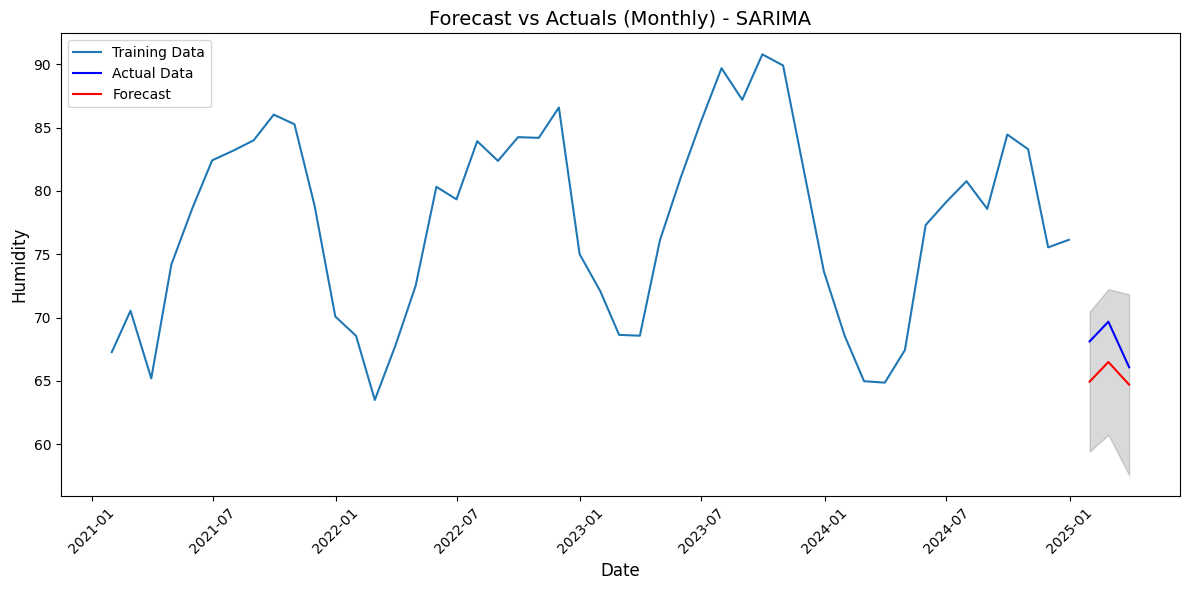

In [47]:
# dự đoán chuỗi thời gian cho biến 'humidity' theo thángforecast_sarima(data_cleaned, 'humidity', split_date='2025-01-01', freq='ME', order=(3, 2, 1), seasonal_order=(1, 1, 1, 12), forecast_steps=3))
forecast_sarima(data, 'humidity', split_date='2025-01-01', freq='ME')

**Nhận xét:**

- **Xu hướng tổng thể**: Mô hình SARIMA nắm bắt tốt xu hướng tổng thể của 'humidity' trong giai đoạn huấn luyện (trước 01/01/2025), phản ánh rõ nhịp điệu lên xuống theo mùa.
- **Độ lệch giữa forecast và actual**: Trong 3 tháng đầu năm 2025, dự báo (đường đỏ) sát với thực tế (đường xanh), nhưng có **một số lệch nhẹ** vào tháng 03/2025.
- **Độ tin cậy**: Khoảng dự báo (vùng xám) từ 01/01/2025 đến 31/03/2025 khá rộng, cho thấy **mức độ không chắc chắn tăng** qua từng tháng.
- **Dự đoán ngắn hạn**: Từ 01/2025 đến 02/2025, forecast và actual bám gần nhau, **dự đoán ngắn hạn tốt**, nhưng lệch tăng vào 03/2025.

### Gió (wind)

In [48]:
# kiểm tra tính dừng cho biến 'wind'
is_stationary = check_stationarity(data, 'wind', freq='ME')

ADF Test for Wind:
ADF Statistic: -4.1105355046041065
p-value: 0.0009304088932545039
Chuỗi wind ổn định (stationary) với p-value < 0.05.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.54289D+00    |proj g|=  2.49355D-01

At iterate    5    f=  1.37221D+00    |proj g|=  1.90690D-02

At iterate   10    f=  1.36379D+00    |proj g|=  3.02590D-02

At iterate   15    f=  1.36017D+00    |proj g|=  4.42832D-03


/home/nguyennn263/miniconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.



At iterate   20    f=  1.35991D+00    |proj g|=  1.48413D-03

At iterate   25    f=  1.35989D+00    |proj g|=  3.00686D-04

At iterate   30    f=  1.35989D+00    |proj g|=  1.47125D-04

At iterate   35    f=  1.35989D+00    |proj g|=  2.20966D-04

At iterate   40    f=  1.35985D+00    |proj g|=  2.68308D-03

At iterate   45    f=  1.35978D+00    |proj g|=  2.19500D-03

At iterate   50    f=  1.35977D+00    |proj g|=  4.78939D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     77      1     0     0   4.789D-05   1.360D+00
  F =   1.3597703345393317     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT       

/home/nguyennn263/miniconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


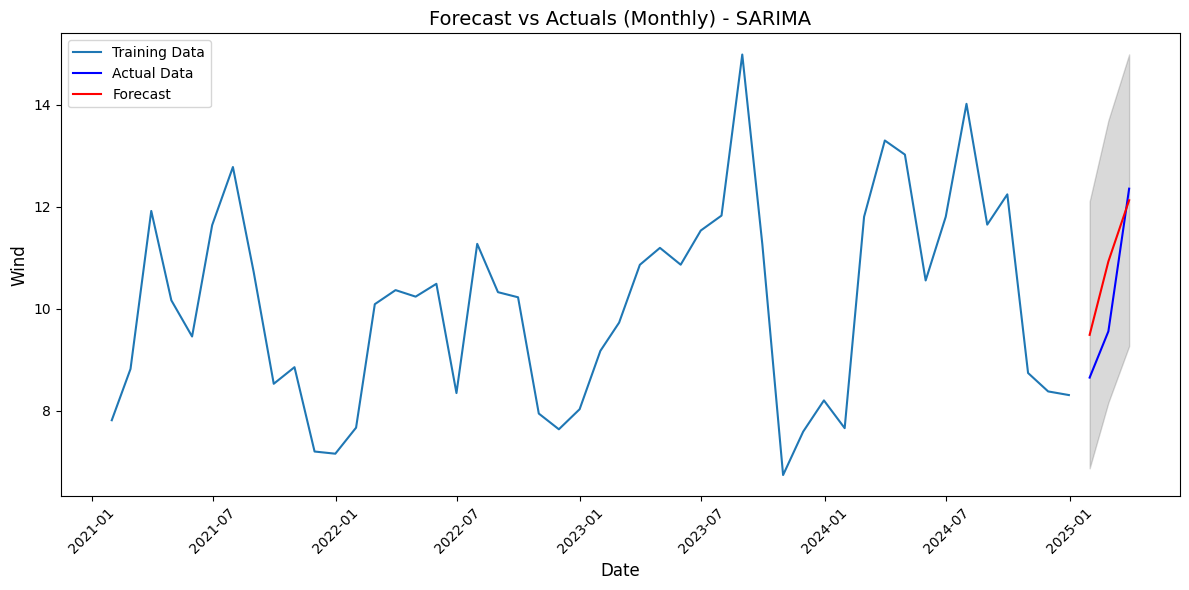

In [49]:
# dự đoán chuỗi thời gian cho biến 'wind' theo tháng
forecast_sarima(data, 'wind', split_date='2025-01-01', freq='ME')

**Nhận xét:**

- **Xu hướng tổng thể**: Mô hình SARIMA nắm bắt được xu hướng biến động tổng thể của 'wind' trong giai đoạn huấn luyện (trước 01/01/2025), nhưng xu hướng mùa vụ không quá rõ rệt.
- **Độ lệch giữa forecast và actual**: Trong 3 tháng đầu năm 2025, dự báo (đường đỏ) khá sát với thực tế (đường xanh), nhưng có **một số lệch nhỏ** vào tháng 03/2025.
- **Độ tin cậy**: Khoảng dự báo (vùng xám) từ 01/01/2025 đến 31/03/2025 khá rộng, cho thấy **mức độ không chắc chắn cao** trong dự đoán vận tốc gió.
- **Dự đoán ngắn hạn**: Từ 01/2025 đến 02/2025, forecast bám sát actual, **dự đoán ngắn hạn tốt**, nhưng lệch tăng nhẹ vào 03/2025.

### Áp suất (pressure)

In [50]:
# kiểm tra tính ổn định của biến 'pressure'
is_stationary = check_stationarity(data, 'pressure', freq='ME')

ADF Test for Pressure:
ADF Statistic: -5.043149626497417
p-value: 1.8218958503972743e-05
Chuỗi pressure ổn định (stationary) với p-value < 0.05.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.03060D+00    |proj g|=  2.38348D-01

At iterate    5    f=  9.46086D-01    |proj g|=  1.49648D-02

At iterate   10    f=  9.42179D-01    |proj g|=  5.24775D-03


/home/nguyennn263/miniconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.



At iterate   15    f=  9.38836D-01    |proj g|=  1.56918D-02

At iterate   20    f=  9.37105D-01    |proj g|=  2.66470D-03

At iterate   25    f=  9.36712D-01    |proj g|=  2.99118D-03

At iterate   30    f=  9.36640D-01    |proj g|=  1.82167D-03

At iterate   35    f=  9.36628D-01    |proj g|=  7.20042D-04

At iterate   40    f=  9.36625D-01    |proj g|=  4.07664D-04

At iterate   45    f=  9.36624D-01    |proj g|=  1.85854D-04
  ys=-1.976E-07  -gs= 7.023E-08 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     46     68      1     1     0   1.880D-04   9.366D-01
  F =  0.93662434373651104     

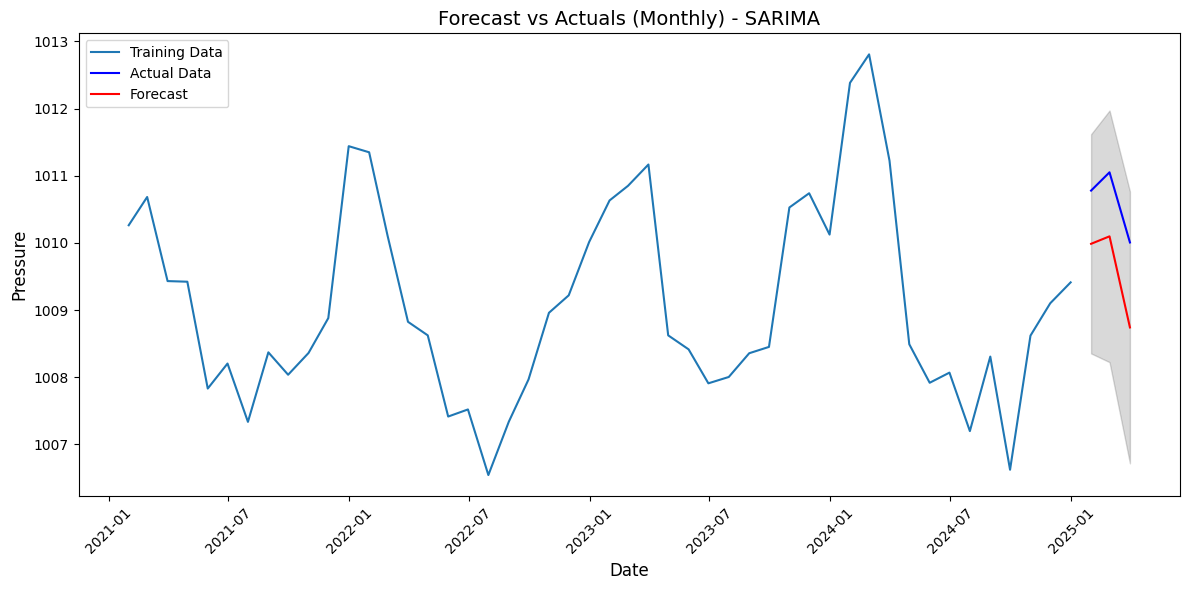

In [51]:
# dư đoán chuỗi thời gian cho biến 'pressure' theo tuần
forecast_sarima(data, 'pressure', split_date='2025-01-01', freq='ME')

**Nhận xét:**

- **Xu hướng tổng thể**: Mô hình SARIMA mô phỏng tốt xu hướng tổng thể của 'pressure' trong giai đoạn huấn luyện (trước 01/01/2025), nhưng biến động khá nhiễu và không theo mùa vụ rõ rệt.
- **Độ lệch giữa forecast và actual**: Trong 3 tháng đầu năm 2025, dự báo (đường đỏ) khá sát với thực tế (đường xanh), cho thấy **mức độ sai lệch nhỏ**.
- **Độ tin cậy**: Khoảng dự báo (vùng xám) từ 01/01/2025 đến 31/03/2025 có độ rộng vừa phải, cho thấy **mức độ không chắc chắn vừa phải**.
- **Dự đoán ngắn hạn**: Từ 01/2025 đến 02/2025, forecast bám sát actual, **dự đoán ngắn hạn tốt**, nhưng lệch nhẹ vào 03/2025.
- **Biến động mùa vụ**: Mô hình chưa phát hiện rõ **quy luật mùa vụ**, nhưng vẫn phản ánh được các dao động nhỏ của áp suất, như xu hướng tăng nhẹ vào 03/2025.

## Dự đoán chất lượng không khí

### Kiểm tra mức độ tương quan với label `aqi`

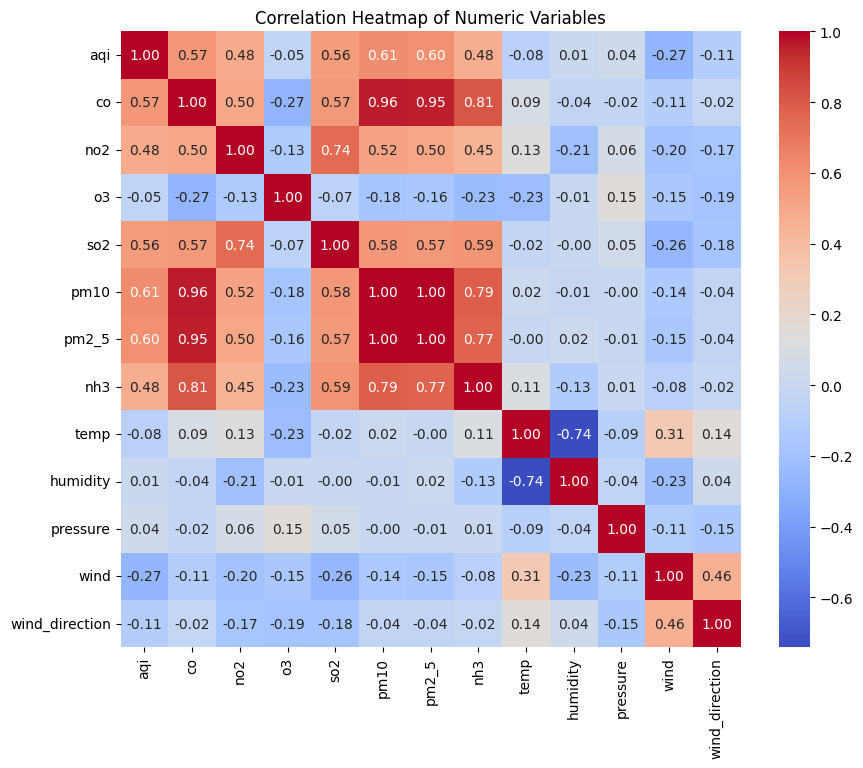

In [52]:
plt.figure(figsize=(10, 8))
sns.heatmap(data[cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap of Numeric Variables")
plt.show()

In [53]:
corr_matrix = data[cols].corr()
target_feature = 'aqi'
correlations = corr_matrix[target_feature].abs().sort_values(ascending = False)
print(f"Correlation score:")
print(correlations[1:])

Correlation score:
pm10              0.613918
pm2_5             0.600069
co                0.573488
so2               0.556137
no2               0.483460
nh3               0.475341
wind              0.269075
wind_direction    0.107287
temp              0.081518
o3                0.047543
pressure          0.037235
humidity          0.013486
Name: aqi, dtype: float64


**Nhận xét:**

- `pm10`, `pm2_5`, `co`, `nh3`, `so2`, `no2` có tương quan rất cao với AQI → là những yếu tố ảnh hưởng chính.
- `wind` tương quan yếu → tác động nhỏ.
- `temp`, `wind_direction`, `humidity`, `pressure`, `o3` tương quan rất thấp → gần như không ảnh hưởng trực tiếp đến AQI.

Do đó ta chỉ lấy các feature có độ tương quan > 0.3

In [54]:
selected_features = correlations[correlations > 0.3].index.tolist()
selected_features.remove(target_feature)
print(f"Selected features based on correlation with {target_feature}:")
print(selected_features)

Selected features based on correlation with aqi:
['pm10', 'pm2_5', 'co', 'so2', 'no2', 'nh3']


## Chia tập dữ liệu

In [55]:
# chia tâm huấn luyện và kiểm tra
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = data[selected_features]
Y = data[target_feature] - 1



X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Huấn luyện mô hình

In [56]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV

def evaluate_model(model, X_test, y_test, model_name=None):
    """
    Đánh giá mô hình phân loại và hiển thị báo cáo kết quả
    
    Parameters:
    -----------
    model : scikit-learn model
        Mô hình đã được huấn luyện
    X_test : array-like
        Dữ liệu kiểm tra
    y_test : array-like
        Nhãn thực tế
    model_name : str, optional
        Tên của mô hình, mặc định là tên lớp của mô hình
        
    Returns:
    --------
    tuple
        (tên mô hình, độ chính xác)
    """
    # Lấy tên mô hình nếu không được cung cấp
    if model_name is None:
        model_name = model.__class__.__name__
    
    # Dự đoán
    y_pred = model.predict(X_test)
    
    # Tính độ chính xác
    accuracy = accuracy_score(y_test, y_pred)
    
    # In báo cáo phân loại
    print(f"Mô hình: {model_name}")
    print(f"Độ chính xác: {accuracy * 100:.2f}%")
    print("Classification Report:\n", classification_report(y_test, y_pred, zero_division=1))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("-" * 50)
    
    # Trả về tuple (tên mô hình, độ chính xác) để sử dụng cho biểu đồ
    return (model_name, accuracy)

def plot_model_accuracies(results):
    """
    Vẽ biểu đồ cột so sánh độ chính xác của các mô hình
    
    Parameters:
    -----------
    results : list of tuples
        Danh sách các tuple (tên mô hình, độ chính xác)
    """
    models, accuracies = zip(*results)
    
    plt.figure(figsize=(10, 6))
    bars = plt.bar(models, accuracies, color='skyblue')
    
    # Thêm giá trị độ chính xác lên đầu mỗi cột
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                f'{height:.4f}', ha='center', va='bottom')
    
    plt.ylim(0, 1.1)  # Đặt giới hạn trục y từ 0 đến 1.1
    plt.xlabel('Mô hình')
    plt.ylabel('Độ chính xác')
    plt.title('So sánh độ chính xác của các mô hình phân loại')
    plt.xticks(rotation=15)
    plt.tight_layout()
    plt.show()

results = []



### Logistic Regression

In [57]:
from sklearn.linear_model import LogisticRegression


# Huấn luyện trên dữ liệu đã chuẩn hóa
lr_model = LogisticRegression(max_iter=1000)  # Thường 1000 là đủ với dữ liệu chuẩn hóa
lr_model.fit(X_train_scaled, y_train)

# Đánh giá mô hình
results.append(evaluate_model(lr_model, X_test_scaled, y_test, "Logistic Regression"))

Mô hình: Logistic Regression
Độ chính xác: 75.44%
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.60      0.72       209
           1       0.84      0.92      0.88      1730
           2       0.50      0.48      0.49      1234
           3       0.56      0.55      0.55      1541
           4       0.92      0.91      0.91      2611

    accuracy                           0.75      7325
   macro avg       0.74      0.69      0.71      7325
weighted avg       0.75      0.75      0.75      7325

Confusion Matrix:
 [[ 126   83    0    0    0]
 [  15 1594  121    0    0]
 [   1  217  587  429    0]
 [   0   13  462  846  220]
 [   0    0    1  237 2373]]
--------------------------------------------------


**Nhận xét:**
Mô hình Logistic Regression với dữ liệu đã được chuẩn hóa đạt độ chính xác 74.45%. Mặc dù độ chính xác tổng thể khá ổn, nhưng sự phân bố giữa các lớp còn chênh lệch. Cụ thể:

- Lớp 4 có hiệu suất tốt nhất (precision 0.91, recall 0.91), trong khi lớp 2 và lớp 3 có độ chính xác thấp (precision và recall đều dưới 0.6).
- Lớp 0 có precision cao (0.82) nhưng recall thấp (0.55), còn lớp 1 có hiệu suất tốt với recall 0.92.
- Ma trận nhầm lẫn cho thấy lớp 2 và lớp 3 có nhiều sự nhầm lẫn, đặc biệt giữa lớp 3 và lớp 2 (443 mẫu lớp 3 bị nhầm thành lớp 2 và ngược lại 482 mẫu).


### Random Forest Classifier

In [58]:
from sklearn.ensemble import RandomForestClassifier

# Sử dụng Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Đánh giá mô hình
results.append(evaluate_model(rf_model, X_test, y_test, "Random Forest"))

Mô hình: Random Forest
Độ chính xác: 81.43%
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.96      0.95       209
           1       0.92      0.93      0.92      1730
           2       0.61      0.57      0.59      1234
           3       0.65      0.63      0.64      1541
           4       0.92      0.95      0.93      2611

    accuracy                           0.81      7325
   macro avg       0.81      0.81      0.81      7325
weighted avg       0.81      0.81      0.81      7325

Confusion Matrix:
 [[ 201    8    0    0    0]
 [  14 1615  101    0    0]
 [   0  138  705  391    0]
 [   0    4  346  974  217]
 [   0    0    0  141 2470]]
--------------------------------------------------


**Nhận xét:**
Mô hình Random Forest đạt độ chính xác 81.14%, tốt hơn so với Logistic Regression. Các lớp 0, 1 và 4 có hiệu suất rất cao (precision và recall đều trên 0.90), nhưng lớp 2 và lớp 3 vẫn còn nhầm lẫn nhiều, đặc biệt giữa lớp 2 và lớp 3 (434 mẫu lớp 2 bị nhầm thành lớp 3 và 307 mẫu ngược lại). Mô hình có thể được cải thiện thêm bằng cách điều chỉnh tham số hoặc cân bằng lại các lớp.

### XGBoost

In [59]:
# Huấn luyện mô hình XGBoost
import xgboost as xgb
# Huấn luyện mô hình XGBoost
xgb_model = xgb.XGBClassifier(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

# Đánh giá mô hình XGBoost
results.append(evaluate_model(xgb_model, X_test, y_test, "XGBoost"))

Mô hình: XGBoost
Độ chính xác: 80.94%
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       209
           1       0.91      0.94      0.92      1730
           2       0.61      0.55      0.58      1234
           3       0.63      0.62      0.63      1541
           4       0.91      0.94      0.93      2611

    accuracy                           0.81      7325
   macro avg       0.81      0.81      0.81      7325
weighted avg       0.80      0.81      0.81      7325

Confusion Matrix:
 [[ 204    4    1    0    0]
 [   9 1621   99    1    0]
 [   0  149  684  400    1]
 [   0    4  340  963  234]
 [   0    0    0  154 2457]]
--------------------------------------------------


**Nhận xét:**
Mô hình XGBoost đạt độ chính xác 80.86%. Các lớp 0, 1 và 4 có hiệu suất rất tốt, đặc biệt là lớp 0 với precision 0.95 và recall 0.96. Tuy nhiên, lớp 2 và lớp 3 vẫn còn gặp một số vấn đề, với precision lần lượt là 0.64 và 0.63, recall lần lượt là 0.53 và 0.66. Ma trận nhầm lẫn cho thấy nhiều nhầm lẫn giữa lớp 2 và lớp 3 (459 mẫu lớp 2 bị nhầm thành lớp 3 và 300 mẫu ngược lại). 

### Gradient Boosting Classifier

In [60]:
from sklearn.ensemble import GradientBoostingClassifier

# Sử dụng Gradient Boosting
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)

# Đánh giá mô hình Gradient Boosting
results.append(evaluate_model(gb_model, X_test, y_test, "Gradient Boosting"))

Mô hình: Gradient Boosting
Độ chính xác: 80.27%
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.95      0.95       209
           1       0.89      0.95      0.92      1730
           2       0.59      0.50      0.54      1234
           3       0.63      0.61      0.62      1541
           4       0.91      0.95      0.93      2611

    accuracy                           0.80      7325
   macro avg       0.80      0.79      0.79      7325
weighted avg       0.79      0.80      0.80      7325

Confusion Matrix:
 [[ 198   11    0    0    0]
 [   9 1636   84    1    0]
 [   0  189  612  433    0]
 [   0    4  333  945  259]
 [   0    0    1  121 2489]]
--------------------------------------------------


**Nhận xét:**
Mô hình Gradient Boosting đạt độ chính xác 80.15%. Các lớp 0, 1 và 4 có hiệu suất rất cao, đặc biệt là lớp 0 với precision 0.94 và recall 0.95. Tuy nhiên, lớp 2 và lớp 3 vẫn gặp khó khăn với precision lần lượt là 0.64 và 0.62, recall lần lượt là 0.48 và 0.62. Ma trận nhầm lẫn cho thấy nhiều nhầm lẫn giữa lớp 2 và lớp 3 (473 mẫu lớp 2 bị nhầm thành lớp 3 và 298 mẫu ngược lại).

### Gaussian Naive Bayes

In [61]:
from sklearn.naive_bayes import GaussianNB

# Sử dụng Naive Bayes (GaussianNB cho dữ liệu liên tục)
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Đánh giá mô hình Naive Bayes
results.append(evaluate_model(nb_model, X_test, y_test, "Naive Bayes"))

Mô hình: Naive Bayes
Độ chính xác: 67.96%
Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.96      0.73       209
           1       0.81      0.85      0.83      1730
           2       0.43      0.51      0.47      1234
           3       0.43      0.45      0.44      1541
           4       0.96      0.76      0.85      2611

    accuracy                           0.68      7325
   macro avg       0.64      0.71      0.66      7325
weighted avg       0.71      0.68      0.69      7325

Confusion Matrix:
 [[ 201    8    0    0    0]
 [ 135 1463  131    1    0]
 [   7  292  635  296    4]
 [   0   46  714  692   89]
 [   0    1    9  614 1987]]
--------------------------------------------------


**Nhận xét:**
Mô hình Naive Bayes đạt độ chính xác 66.79%, thấp hơn so với các mô hình khác. Lớp 1 có hiệu suất khá cao với precision 0.79 và recall 0.83. Lớp 0 có recall rất cao (0.96) nhưng precision thấp (0.57), trong khi lớp 3 có hiệu suất kém (precision 0.42, recall 0.45). Lớp 2 cũng gặp khó khăn (precision 0.44, recall 0.51), nhưng lớp 4 có hiệu suất tốt (precision 0.95). Ma trận nhầm lẫn cho thấy nhiều nhầm lẫn giữa lớp 2 và lớp 3 (332 mẫu lớp 2 bị nhầm thành lớp 3 và 690 mẫu ngược lại). Mô hình có thể cải thiện thêm bằng cách điều chỉnh tham số hoặc cân bằng lại các lớp.

### K-Neighbors Classifier

In [62]:
from sklearn.neighbors import KNeighborsClassifier

# Sử dụng k-NN
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)

# Đánh giá mô hình k-NN
results.append(evaluate_model(knn_model, X_test_scaled, y_test, "k-NN"))

Mô hình: k-NN
Độ chính xác: 77.73%
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.86      0.87       209
           1       0.86      0.91      0.88      1730
           2       0.55      0.55      0.55      1234
           3       0.61      0.57      0.59      1541
           4       0.91      0.92      0.91      2611

    accuracy                           0.78      7325
   macro avg       0.76      0.76      0.76      7325
weighted avg       0.77      0.78      0.77      7325

Confusion Matrix:
 [[ 180   29    0    0    0]
 [  24 1570  125   11    0]
 [   0  198  674  356    6]
 [   0   34  396  871  240]
 [   0    0   22  190 2399]]
--------------------------------------------------


**Nhận xét:**
Mô hình k-NN đạt độ chính xác 76.50%. Các lớp 0, 1 và 4 có hiệu suất khá tốt, đặc biệt là lớp 1 với precision 0.84 và recall 0.91. Tuy nhiên, lớp 2 và lớp 3 có độ chính xác và recall thấp (precision lần lượt là 0.56 và 0.58, recall lần lượt là 0.50 và 0.56), dẫn đến hiệu suất chưa cao. Ma trận nhầm lẫn cho thấy nhiều nhầm lẫn giữa lớp 2 và lớp 3 (409 mẫu lớp 2 bị nhầm thành lớp 3 và 388 mẫu ngược lại). Mô hình có thể cải thiện thêm bằng cách điều chỉnh số lượng láng giềng hoặc cân bằng lại các lớp.

### MLP Classifier

In [63]:
from sklearn.neural_network import MLPClassifier

# Khởi tạo mô hình MLP
mlp_model = MLPClassifier(hidden_layer_sizes=(128, 64), max_iter=1000, random_state=42)

# Huấn luyện mô hình MLP
mlp_model.fit(X_train, y_train)

# Đánh giá mô hình MLP
results.append(evaluate_model(mlp_model, X_test, y_test, "MLP Classifier"))

Mô hình: MLP Classifier
Độ chính xác: 75.58%
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.68      0.81       209
           1       0.90      0.84      0.87      1730
           2       0.50      0.59      0.54      1234
           3       0.57      0.47      0.52      1541
           4       0.88      0.95      0.91      2611

    accuracy                           0.76      7325
   macro avg       0.77      0.71      0.73      7325
weighted avg       0.76      0.76      0.75      7325

Confusion Matrix:
 [[ 143   66    0    0    0]
 [   3 1457  270    0    0]
 [   0   81  734  417    2]
 [   0    6  476  726  333]
 [   0    0    1  134 2476]]
--------------------------------------------------


**Nhận xét:**
Mô hình MLP Classifier đạt độ chính xác 79.64%. Các lớp 0, 1 và 4 có hiệu suất rất cao, đặc biệt là lớp 4 với precision 0.92 và recall 0.94. Tuy nhiên, lớp 2 và lớp 3 vẫn còn gặp khó khăn, với precision lần lượt là 0.61 và 0.63, recall lần lượt là 0.55 và 0.63. Ma trận nhầm lẫn cho thấy nhiều nhầm lẫn giữa lớp 2 và lớp 3 (404 mẫu lớp 2 bị nhầm thành lớp 3 và 355 mẫu ngược lại). Mô hình có thể được cải thiện thêm bằng cách điều chỉnh tham số hoặc cân bằng lại các lớp.

### So sánh độ chính xác giữa các mô hình

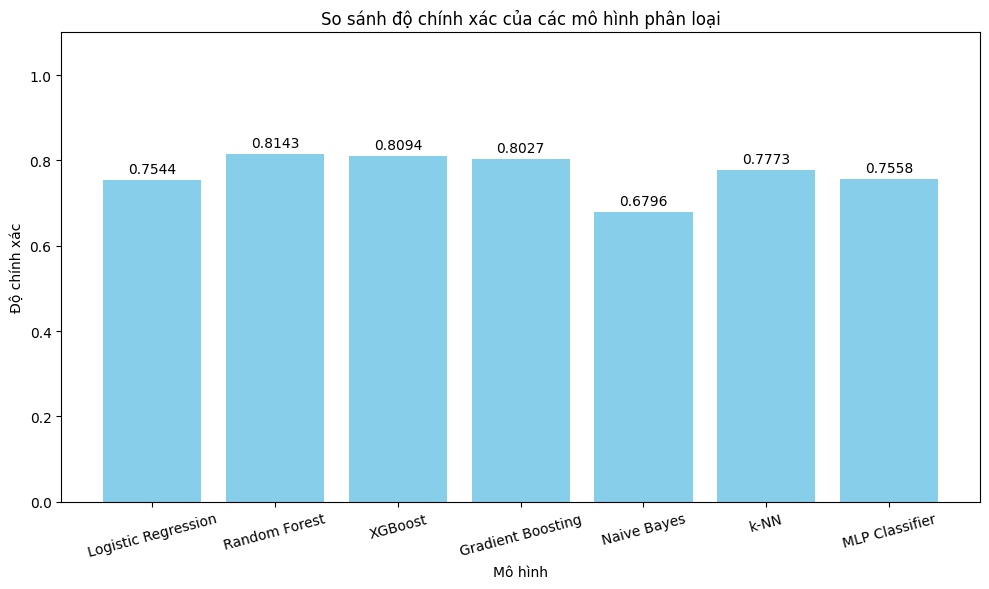

In [64]:
# vẽ biểu đồ so sánh độ chính xác của các mô hình

plot_model_accuracies(results)


**Nhận xét**: Random Forest là mô hình có độ chính xác cao nhất với 81.14%, vượt trội so với các mô hình còn lại. Theo sau đó là XGBoost (80.86%), Gradient Boosting (80.15%) và MLP Classifier (79.64%), ba mô hình này có độ chính xác khá gần nhau. k-NN đạt 76.50%, tiếp theo là Logistic Regression với 74.45%. Các mô hình Naive Bayes (66.79%) có hiệu suất thấp hơn.

# KẾT LUẬN

**Kết luận**: 
- Phân tích chuỗi thời gian với mô hình SARIMA cho thấy khả năng dự báo tốt về xu hướng tổng thể và biến động mùa vụ của nhiệt độ, độ ẩm, vận tốc gió và áp suất trong 3 tháng đầu năm 2025, dù vẫn còn hạn chế trong việc dự đoán các biến động bất thường. 
- Dường như yếu tố thời tiết không ảnh hưởng nhiều tới chỉ số chất lượng không khí. 

In [65]:
data.to_csv('Dataset/final_data_cleaned.csv', index=False)